# input data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/mitbit-arrhythmia-database/mitbih_database/112annotations.txt
/kaggle/input/mitbit-arrhythmia-database/mitbih_database/233.csv
/kaggle/input/mitbit-arrhythmia-database/mitbih_database/108.csv
/kaggle/input/mitbit-arrhythmia-database/mitbih_database/118annotations.txt
/kaggle/input/mitbit-arrhythmia-database/mitbih_database/231.csv
/kaggle/input/mitbit-arrhythmia-database/mitbih_database/207.csv
/kaggle/input/mitbit-arrhythmia-database/mitbih_database/115annotations.txt
/kaggle/input/mitbit-arrhythmia-database/mitbih_database/108annotations.txt
/kaggle/input/mitbit-arrhythmia-database/mitbih_database/123annotations.txt
/kaggle/input/mitbit-arrhythmia-database/mitbih_database/102annotations.txt
/kaggle/input/mitbit-arrhythmia-database/mitbih_database/209.csv
/kaggle/input/mitbit-arrhythmia-database/mitbih_database/203annotations.txt
/kaggle/input/mitbit-arrhythmia-database/mitbih_database/202annotations.txt
/kaggle/input/mitbit-arrhythmia-database/mitbih_database/215annotat

# libraries and imports

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import os

import matplotlib.pyplot as plt
import csv
import itertools
import collections
import pywt

from scipy import stats
import scipy.spatial

# supervised and unsupervised learning, algorithms for classification, regression, clustering, and dimensionality reduction
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
# from sklearn.metrics import plot_confusion_matrix

# training neural networks runs on top of TensorFlow with fast experimentation and iteration
import keras
from keras.models import Sequential
from keras.layers import Conv1D, AvgPool1D, Flatten, Dense, Dropout, Softmax
from keras.optimizers import Adam 
from keras import regularizers
import keras.utils
from keras import utils as np_utils
from keras.utils import to_categorical
from tensorflow.keras.utils import plot_model

# plots should be displayed automatically within the notebook, and there's no need to explicitly call plt.show()
%matplotlib inline

# uploading input data from Kaggle

In [3]:
# Upload data from Kaggle input
path = '../input/mitbit-arrhythmia-database//mitbih_database/'

# in signal processing or time series analysis, a window size is used to divide the data into smaller segments
window_size = 180

# used to limit the number of iterations and data points
maximum_counting = 10000

# creates list of classes (different types of arrhythmias) : labels of our data 
classes = ['N', 'L', 'R', 'A', 'V']

# n classes by getting the length of the classes list
n_classes = len(classes)

# list is filled with zeros. The length of this list is equal to the number of classes to keep track 
count_classes = [0]*n_classes

# to store the features of the data points
X = list()
y = list()

# Discovering our filenames

In [4]:
# Read files by walking the dictionary tree from top-down
# next(os.walk(path)) and [2] selects the third element of the3-tuple (dirpath, dirnames, filenames):list of filenames in the directory
filenames = next(os.walk(path))[2]

# Split and save .csv from input data in this list
records = list()

# Split and save .txt from input data in this list
annotations = list()

# sorts the filenames list in ascending order (in alphabetical order)
filenames.sort()

# What are filenames

In [5]:
filenames

['100.csv',
 '100annotations.txt',
 '101.csv',
 '101annotations.txt',
 '102.csv',
 '102annotations.txt',
 '103.csv',
 '103annotations.txt',
 '104.csv',
 '104annotations.txt',
 '105.csv',
 '105annotations.txt',
 '106.csv',
 '106annotations.txt',
 '107.csv',
 '107annotations.txt',
 '108.csv',
 '108annotations.txt',
 '109.csv',
 '109annotations.txt',
 '111.csv',
 '111annotations.txt',
 '112.csv',
 '112annotations.txt',
 '113.csv',
 '113annotations.txt',
 '114.csv',
 '114annotations.txt',
 '115.csv',
 '115annotations.txt',
 '116.csv',
 '116annotations.txt',
 '117.csv',
 '117annotations.txt',
 '118.csv',
 '118annotations.txt',
 '119.csv',
 '119annotations.txt',
 '121.csv',
 '121annotations.txt',
 '122.csv',
 '122annotations.txt',
 '123.csv',
 '123annotations.txt',
 '124.csv',
 '124annotations.txt',
 '200.csv',
 '200annotations.txt',
 '201.csv',
 '201annotations.txt',
 '202.csv',
 '202annotations.txt',
 '203.csv',
 '203annotations.txt',
 '205.csv',
 '205annotations.txt',
 '207.csv',
 '207ann

# Split filenames into .CSV & .TXT files

In [6]:
# It splits the filename: filename without the extension // file extension 
for f in filenames:
    filename, file_extension = os.path.splitext(f)
    
    # *.csv
    if(file_extension == '.csv'):
        records.append(path + filename + file_extension)

    # *.txt
    else:
        annotations.append(path + filename + file_extension)

# What are .TXT files

In [7]:
# .txt
annotations

['../input/mitbit-arrhythmia-database//mitbih_database/100annotations.txt',
 '../input/mitbit-arrhythmia-database//mitbih_database/101annotations.txt',
 '../input/mitbit-arrhythmia-database//mitbih_database/102annotations.txt',
 '../input/mitbit-arrhythmia-database//mitbih_database/103annotations.txt',
 '../input/mitbit-arrhythmia-database//mitbih_database/104annotations.txt',
 '../input/mitbit-arrhythmia-database//mitbih_database/105annotations.txt',
 '../input/mitbit-arrhythmia-database//mitbih_database/106annotations.txt',
 '../input/mitbit-arrhythmia-database//mitbih_database/107annotations.txt',
 '../input/mitbit-arrhythmia-database//mitbih_database/108annotations.txt',
 '../input/mitbit-arrhythmia-database//mitbih_database/109annotations.txt',
 '../input/mitbit-arrhythmia-database//mitbih_database/111annotations.txt',
 '../input/mitbit-arrhythmia-database//mitbih_database/112annotations.txt',
 '../input/mitbit-arrhythmia-database//mitbih_database/113annotations.txt',
 '../input/m

# What are .CSV files

In [8]:
# .csv
records

['../input/mitbit-arrhythmia-database//mitbih_database/100.csv',
 '../input/mitbit-arrhythmia-database//mitbih_database/101.csv',
 '../input/mitbit-arrhythmia-database//mitbih_database/102.csv',
 '../input/mitbit-arrhythmia-database//mitbih_database/103.csv',
 '../input/mitbit-arrhythmia-database//mitbih_database/104.csv',
 '../input/mitbit-arrhythmia-database//mitbih_database/105.csv',
 '../input/mitbit-arrhythmia-database//mitbih_database/106.csv',
 '../input/mitbit-arrhythmia-database//mitbih_database/107.csv',
 '../input/mitbit-arrhythmia-database//mitbih_database/108.csv',
 '../input/mitbit-arrhythmia-database//mitbih_database/109.csv',
 '../input/mitbit-arrhythmia-database//mitbih_database/111.csv',
 '../input/mitbit-arrhythmia-database//mitbih_database/112.csv',
 '../input/mitbit-arrhythmia-database//mitbih_database/113.csv',
 '../input/mitbit-arrhythmia-database//mitbih_database/114.csv',
 '../input/mitbit-arrhythmia-database//mitbih_database/115.csv',
 '../input/mitbit-arrhyth

# Set Configurations For Matplotlib

In [9]:
# changes the default size of the figure to 30 units wide and 6 units high
plt.rcParams["figure.figsize"] = (30,6)

# sets the default linewidth and thickness for all lines in the plot to 1
plt.rcParams['lines.linewidth'] = 1

# sets the default color of all lines in the plot to blue ('b')
plt.rcParams['lines.color'] = 'b'

# enables the grid on the plot so the grid is displayed on the plot
plt.rcParams['axes.grid'] = True 

# Wavelet Denoising Function

In [10]:
# PyWavelets to perform wavelet denoising on the input data
def denoise(data): 
    
    #Symlet 4 wavelet: most commonly used wavelets in signal processing // symmetric around zero // compact support in time
    w = pywt.Wavelet('sym4')
    
    maxlev = pywt.dwt_max_level(len(data), w.dec_len)
    
    #threshold for filtering, below this threshold will be set to zero = removing noise from the data
    threshold = 0.04

    coeffs = pywt.wavedec(data, 'sym4', level=maxlev)
    for i in range(1, len(coeffs)):
        coeffs[i] = pywt.threshold(coeffs[i], threshold*max(coeffs[i]))
        
    datarec = pywt.waverec(coeffs, 'sym4')
    
    return datarec

# Applying Preprocessing on Data

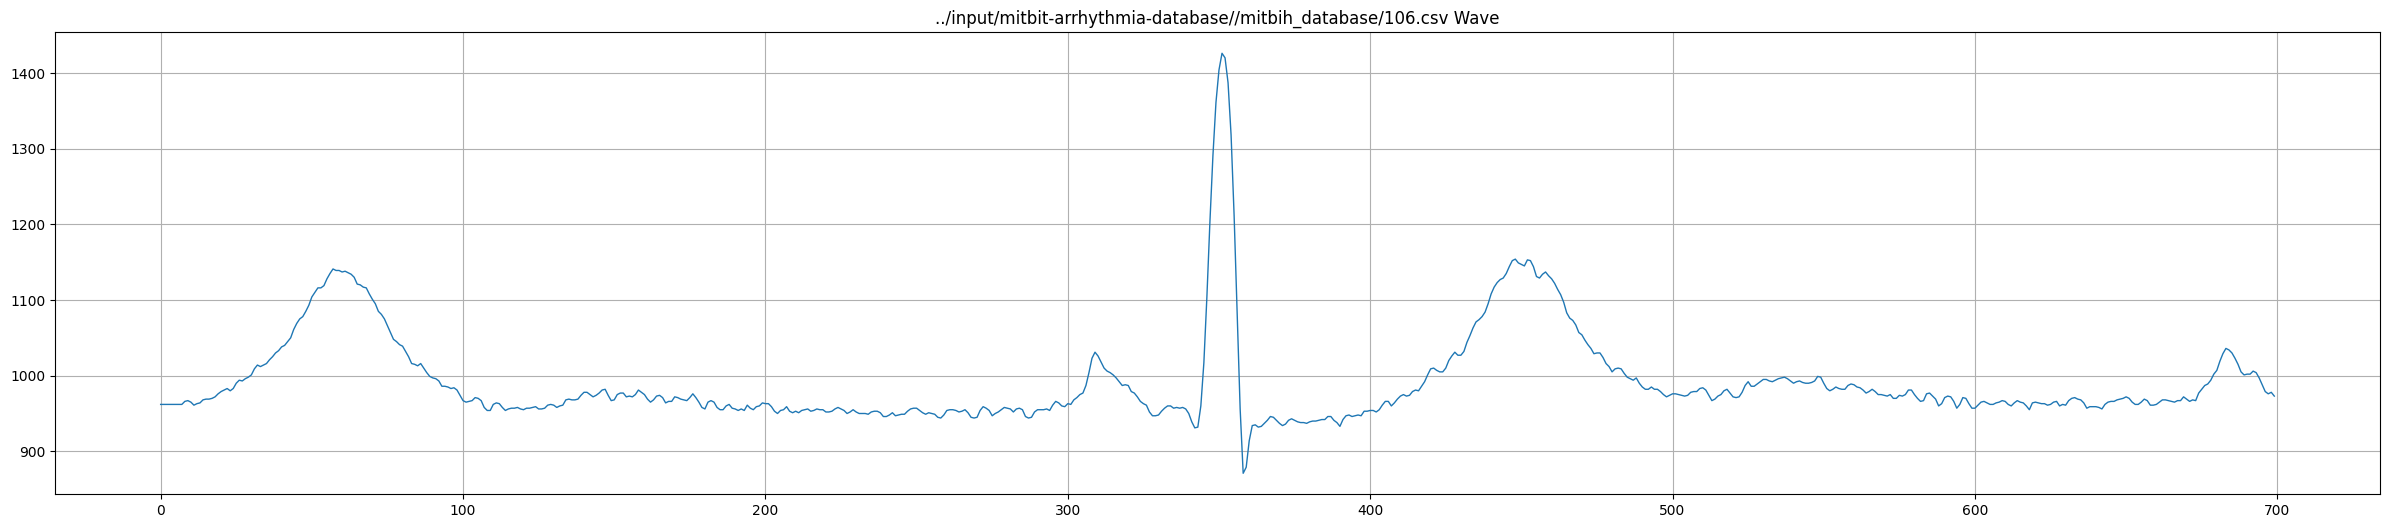

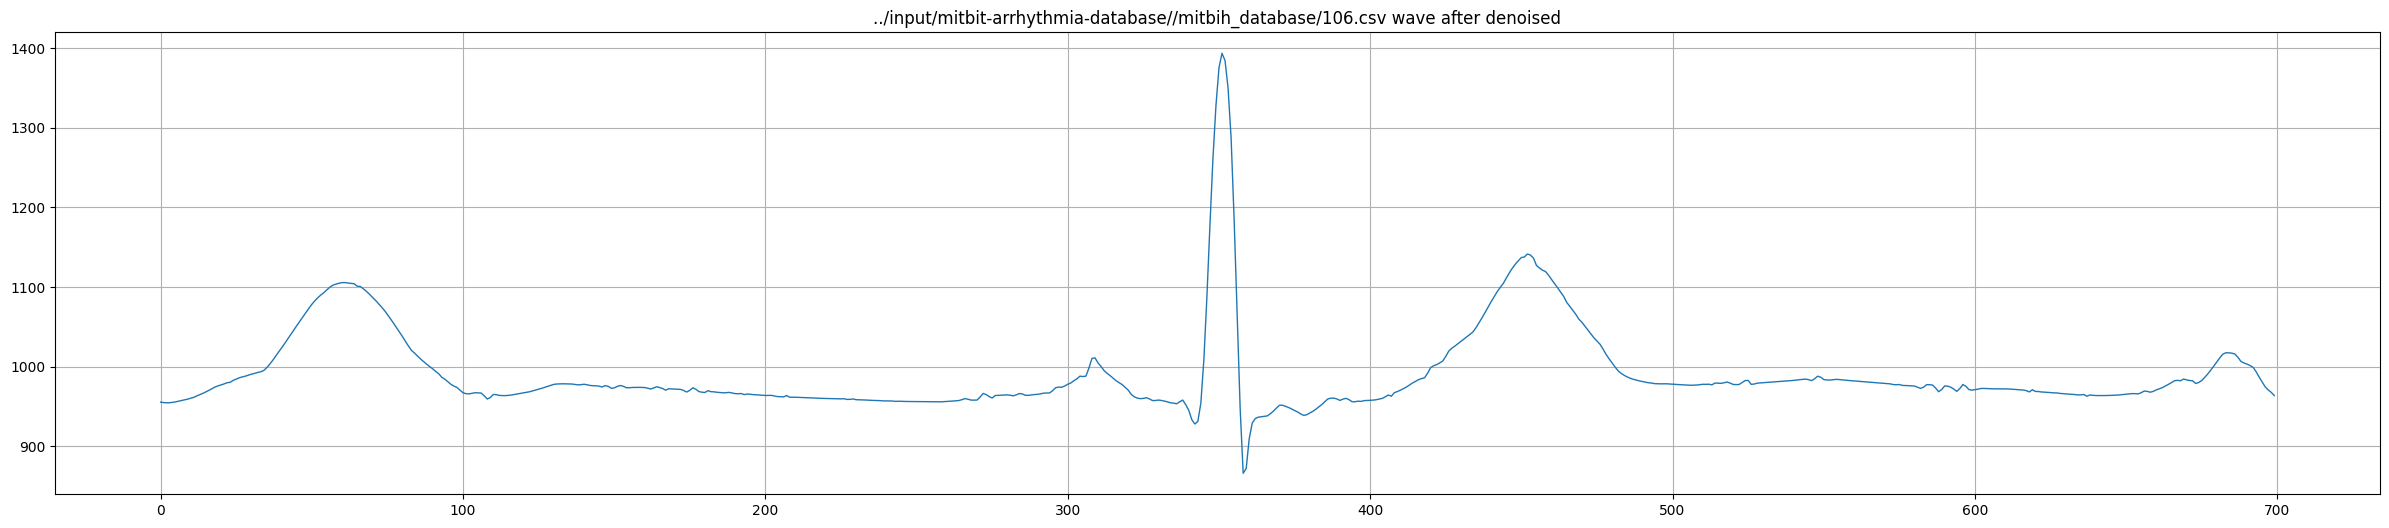

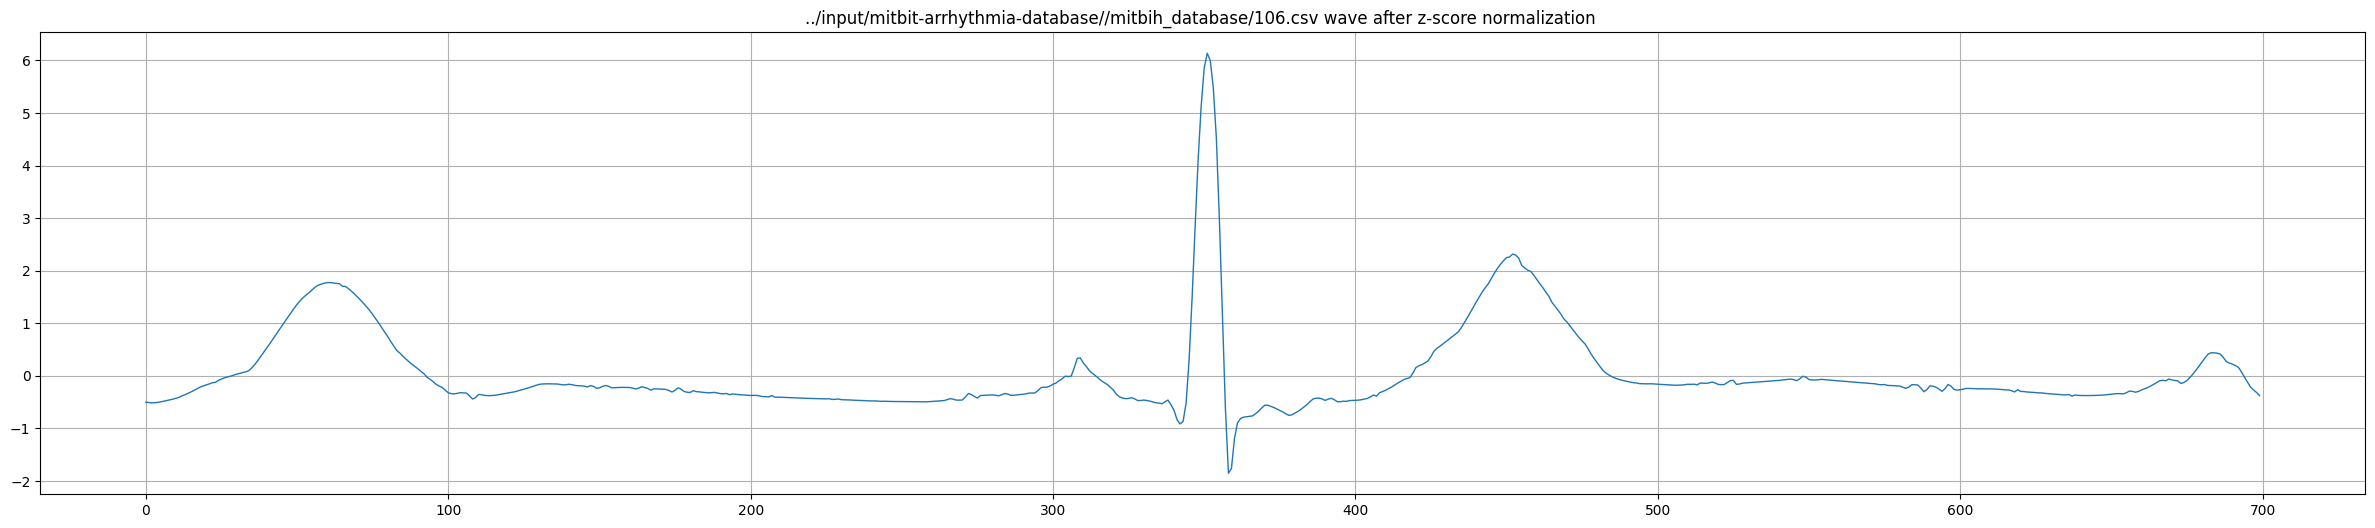

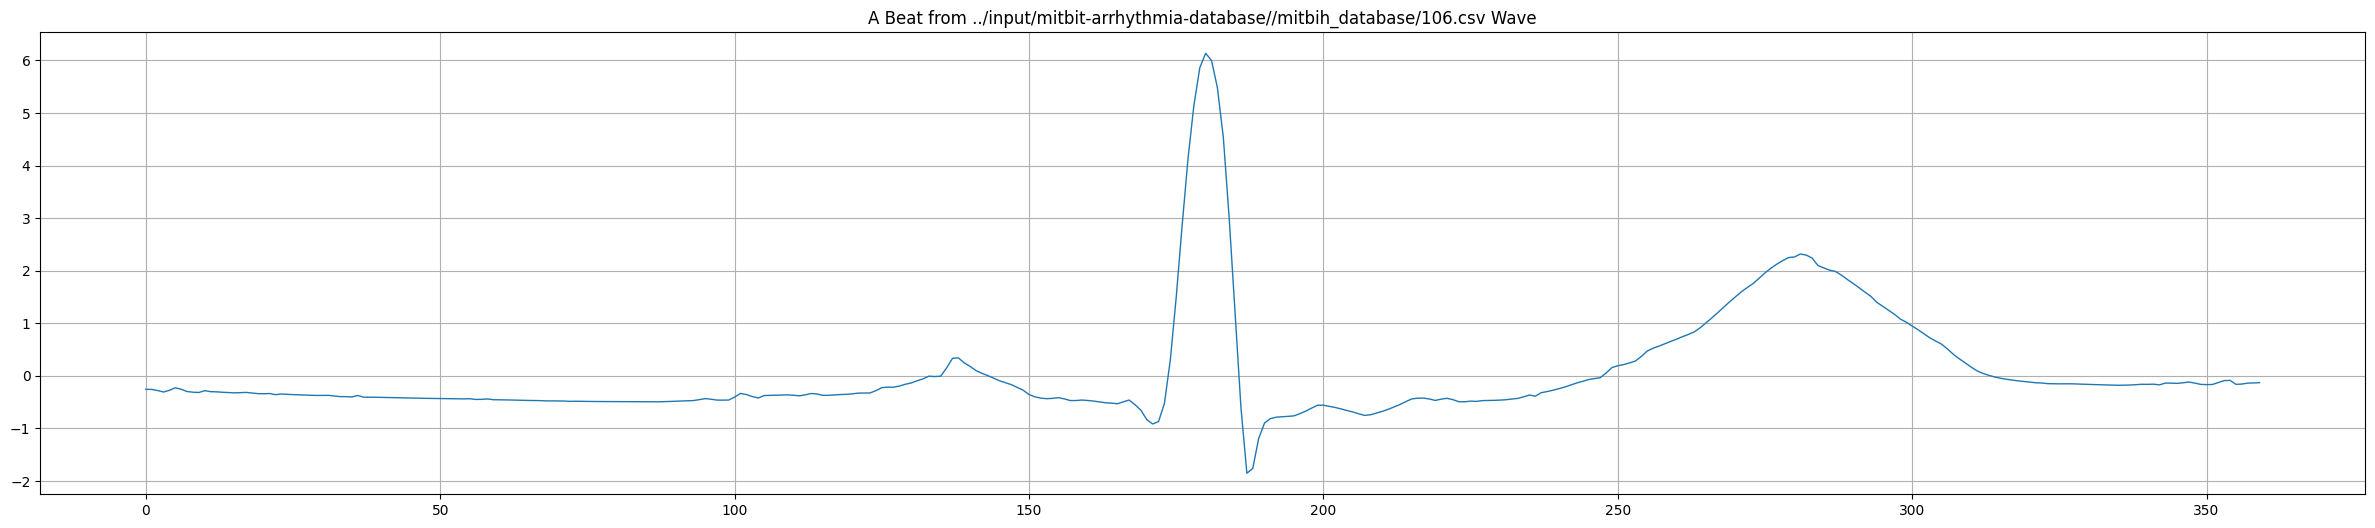

(100012, 360) (100012,)


In [11]:
# in previous lines we had:
# for f in filenames:
#     filename, file_extension = os.path.splitext(f)
    
#     # *.csv
#     if(file_extension == '.csv'):
#         records.append(path + filename + file_extension)


# iterates over each record in the records list
for r in range(0,len(records)):
    signals = []

    #opens the CSV file located at the path stored in records[r], The 'rt' mode means the file is opened for reading in text mode
    with open(records[r], 'rt') as csvfile:
        
        #read the contents of the opened CSV file
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|') 
        row_index = -1
        
        #for each row in the CSV file, signals are inserted
        for row in spamreader:
            if(row_index >= 0):
                signals.insert(row_index, int(row[1]))
            row_index += 1
            
            
# Plot an example to the signals (record number 6)
    
    #plot input wave
    if r == 6:
        plt.title(records[6] + " Wave")
        plt.plot(signals[0:700])  #one pulse of ECG signal
        plt.show()
       
    
    #plot input wave afte denoised
    signals = denoise(signals)
    if r == 6:
        plt.title(records[6] + " wave after denoised")
        plt.plot(signals[0:700])
        plt.show()
        
        
    # plot input wave afte denoised + z-score normalization
    # z-score measures deviations from the mean: how unusual the data point is in relation to other data points
    # Compute the z score of each value in the sample
    # Z-score normalization refers to the process of normalizing every value in a dataset such that 
    # the mean of all of the values is 0 and the standard deviation is 1
    signals = stats.zscore(signals)
    if r == 6:
        plt.title(records[6] + " wave after z-score normalization ")
        plt.plot(signals[0:700])
        plt.show()
    
    
    # Read anotations
    # indicating that no beat has been printed yet
    example_beat_printed = False
    
    #opens a file located at the path specified by annotations[r], The 'r': opened in read mode
    with open(annotations[r], 'r') as fileID:
        
        # reads all lines from the file and stores them, Each string in the Data list represents a line in the file
        data = fileID.readlines() 
        beat = list()

        
        
        #R position and Arrhythmia class
        for d in range(1, len(data)): # 0 index is Chart Head
            
            #The split() method splits a string into a list of substrings
            splitted = data[d].split(' ')
            
            #filters out any empty strings from the splitted list
            splitted = filter(None, splitted)
            
            #returns next item in list
            next(splitted) # Time... Clipping
            
            #returns next item in list in integer (Sample ID)
            pos = int(next(splitted)) 
            
            #returns next item in list (Type)
            arrhythmia_type = next(splitted) 
            
            
            #classes = ['N', 'L', 'R', 'A', 'V']
            if(arrhythmia_type in classes):
                
                #arrhythmia_type='R', arrhythmia_index=2,'R' is at index 2 in the classes list
                arrhythmia_index = classes.index(arrhythmia_type)
                
           # if count_classes[arrhythmia_index] > maximum_counting: # avoid overfitting
                #    pass
            #else:
            
                count_classes[arrhythmia_index] += 1
                
                
                if(window_size <= pos and pos < (len(signals) - window_size)):
                    beat = signals[pos-window_size:pos+window_size]     ## REPLACE WITH R-PEAK DETECTION
                    
                    # plot input wave a beat
                    if r == 6 and not example_beat_printed: 
                        plt.title("A Beat from " + records[6] + " Wave")
                        plt.plot(beat)
                        plt.show()
                        example_beat_printed = True

                    #The beats and their corresponding arrhythmia labels are stored in lists X and y
                    X.append(beat)
                    y.append(arrhythmia_index)

# data shape
print(np.shape(X), np.shape(y))

# (100012, 360): 2D array with 100012 rows and 360 columns, 
   #Each row likely corresponds to a beat, and each column represents a data point within that beat
    
# (100012,): 1D array with 100012 elements,
   #Each element corresponds to the arrhythmia index for the corresponding beat in X

In [14]:
for i in range(0,len(X)):
        X[i] = np.append(X[i], y[i])
#         X[i].append(y[i])

print(np.shape(X))


# 100012 represents the number of beats.
# 361 represents the length of each beat after appending the arrhythmia index 360 + 1 

(100012, 361)


# Visualizing Classes Distributions

360
0.0    75011
1.0     8071
2.0     7255
4.0     7129
3.0     2546
Name: count, dtype: int64


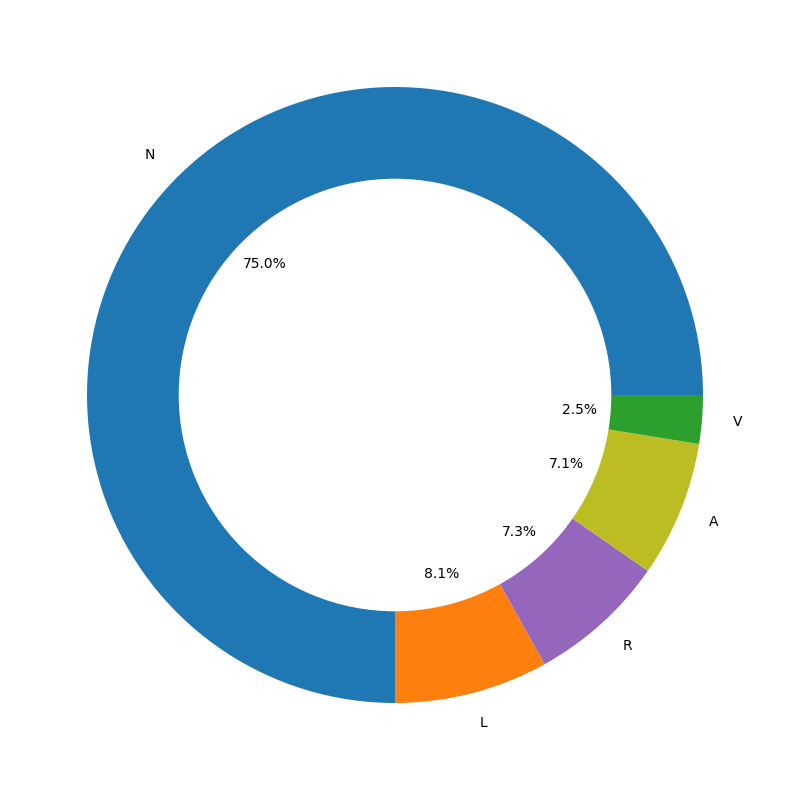

In [15]:
# DataFrame Creation: Convert the list of beats X into a pandas DataFrame
X_train_df = pd.DataFrame(X)

# count of each arrhythmia class by using the last column of the DataFrame
    # the arrhythmia index is appended at the end of each beat
per_class = X_train_df[X_train_df.shape[1]-1].value_counts()

print(per_class)


# Pie Chart Visualization

plt.figure(figsize=(30,10))

# center coordinates at (0, 0), radius of 0.7, creates a hole in the center of the pie chart, resulting in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')

plt.pie(per_class, labels=['N', 'L', 'R', 'A', 'V'], colors=['tab:blue','tab:orange','tab:purple','tab:olive','tab:green'],autopct='%1.1f%%')

# get current figure
p=plt.gcf()

# adds the white circle
p.gca().add_artist(my_circle)

plt.show()

# Balancing Classes Distributions

In [16]:
# index of arrhythmia type in 5 classes 
df_1=X_train_df[X_train_df[X_train_df.shape[1]-1]==1]
df_2=X_train_df[X_train_df[X_train_df.shape[1]-1]==2]
df_3=X_train_df[X_train_df[X_train_df.shape[1]-1]==3]
df_4=X_train_df[X_train_df[X_train_df.shape[1]-1]==4]
# df_5=X_train_df[X_train_df[X_train_df.shape[1]-1]==5]
df_0=(X_train_df[X_train_df[X_train_df.shape[1]-1]==0]).sample(n=5000,random_state=42)

# balancing the data
df_1_upsample=resample(df_1,replace=True,n_samples=5000,random_state=122)
df_2_upsample=resample(df_2,replace=True,n_samples=5000,random_state=123)
df_3_upsample=resample(df_3,replace=True,n_samples=5000,random_state=124)
df_4_upsample=resample(df_4,replace=True,n_samples=5000,random_state=125)
# df_5_upsample=resample(df_5,replace=True,n_samples=5000,random_state=126)

# creates a new rebalanced data frame
X_train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

360
0.0    5000
1.0    5000
2.0    5000
3.0    5000
4.0    5000
Name: count, dtype: int64


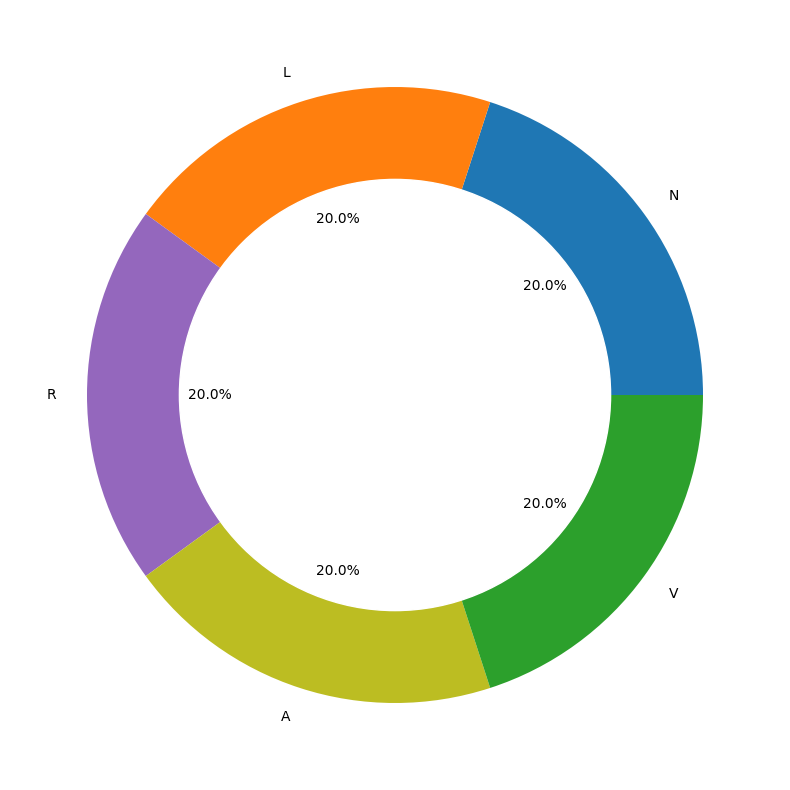

In [17]:
# count of each arrhythmia class by using the last column of the DataFrame
    # the arrhythmia index is appended at the end of each beat
per_class = X_train_df[X_train_df.shape[1]-1].value_counts()
print(per_class)

# Pie Chart Visualization
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(per_class, labels=['N', 'L', 'R', 'A', 'V'], colors=['tab:blue','tab:orange','tab:purple','tab:olive','tab:green'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

# Split Data into Training part & Testing part

In [18]:
# 5 classes each 5000 = 25000 
# spliting rebalanced dataframe to train and test
train, test = train_test_split(X_train_df, test_size=0.20)

print("X_train : ", np.shape(train))
print("X_test  : ", np.shape(test))

X_train :  (20000, 361)
X_test  :  (5000, 361)


# preprocessing step (for labels) for classification

In [19]:
# the last column of the DataFrame:arrhythmia index is appended at the end of each beat

# Extract Target Labels: for train and test
target_train=train[train.shape[1]-1]
target_test=test[test.shape[1]-1]

# convert the target labels into one-hot encoded vectors
# categorytuns to binay column
train_y=to_categorical(target_train)
test_y=to_categorical(target_test)

print(np.shape(train_y), np.shape(test_y))

# training set has 20,000 samples, each represented as a one-hot encoded vector of length 5 (the number of classes)
# testing set has 5,000 samples with the same one-hot encoded representation

(20000, 5) (5000, 5)


# preprocessing step (for features) for classification

In [20]:
# select all rows and all columns up to the last column, excluding the last column (contains the target labels)
train_x = train.iloc[:,:train.shape[1]-1].values
test_x = test.iloc[:,:test.shape[1]-1].values

# working with convolutional neural networks the input shape may need to include a channel dimension
# train_x = train_x.reshape(len(train_x), train_x.shape[1],1)
# test_x = test_x.reshape(len(test_x), test_x.shape[1],1)

print(np.shape(train_x), np.shape(test_x))

(20000, 360) (5000, 360)


# **ANN**
 using the Keras library, which is typically used for deep learning tasks

# Creating the Model

In [21]:
# Instanciate an empty model creates an empty linear stack of layers for building the model
ANNmodel = Sequential() # Dombale Tavali

# input layer of the model have an input shape of 360
# Input shape = N = 360

# regularization is a technique used to prevent overfitting (don't make your weights too big!) 
# additional term added to the loss function during the training of a machine learning model

# Hidden Layer (Dense Layer with ReLU Activation) adds a dense (fully connected) layer to the model with 128 units
ANNmodel.add(Dense(128, bias_regularizer=regularizers.l2(0.0001), input_shape=(360,), activation='relu'))

# Output Layer (Dense Layer with Softmax Activation) adds the output layer to the model with 5 units
ANNmodel.add(Dense(5, bias_regularizer=regularizers.l2(0.0001)))


#used for multi-class classification
ANNmodel.add(Softmax())

# number of trainable parameters, the input and output shapes of each layer, and the total number of parameters in the model
ANNmodel.summary()

# Each unit in the dense layer has its own weight for each input feature + one bias term
# number of parameters for this layer is (number of input features + 1) * number of units.
# (360 + 1) * 128 = 46,128 parameters

# Each unit in the dense_1 layer has its own weight for each input feature + one bias term
# number of parameters for this layer is (number of input features + 1) * number of units.
# (128 + 1) * 5 = 645 parameters

# Each parameter represents a weight or bias value that the model will adjust during the training process to learn the patterns in the data

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               46208     
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
 softmax (Softmax)           (None, 5)                 0         
                                                                 
Total params: 46853 (183.02 KB)
Trainable params: 46853 (183.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


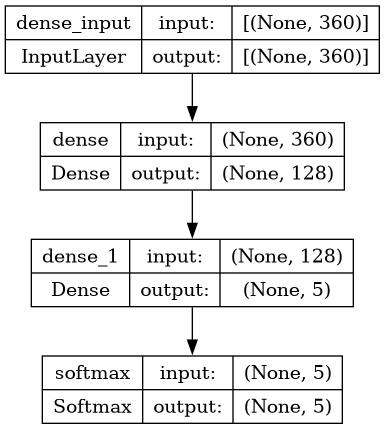

In [22]:
from tensorflow.keras.utils import plot_model

plot_model(ANNmodel, show_shapes=True, to_file='model_plot.png')

In [23]:
# loss function is used to : y-y'=0
# categorical cross-entropy loss measures the dissimilarity between the true distribution and the predicted distribution

# The accuracy metric represents the proportion of correctly classified samples

# optimizer is responsible for minimizing the loss function by adjusting the model parameters during the training process

ANNmodel.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train and Test

In [24]:
# train_x : the input data (features) for training the model
# train_y : the target data (labels) corresponding to the input data
# batch_size : the number of samples used in each iteration (gradient update) during training
            # the model will be updated after processing each batch of 1000 samples
# epochs : the number of times the model will iterate over the entire training dataset
# verbose : progress bar is displayed during training, showing the completion of each epoch
# validation_data : how well the model generalizes to unseen data

history = ANNmodel.fit(train_x, train_y, batch_size=1000, epochs=20, verbose=1, validation_data=(test_x, test_y))

Epoch 1/20
20/20 [==============================] - 1s 17ms/step - loss: 1.1572 - accuracy: 0.5932 - val_loss: 0.7231 - val_accuracy: 0.7984
Epoch 2/20
20/20 [==============================] - 0s 7ms/step - loss: 0.5623 - accuracy: 0.8407 - val_loss: 0.4713 - val_accuracy: 0.8728
Epoch 3/20
20/20 [==============================] - 0s 8ms/step - loss: 0.4044 - accuracy: 0.8942 - val_loss: 0.3611 - val_accuracy: 0.9068
Epoch 4/20
20/20 [==============================] - 0s 7ms/step - loss: 0.3213 - accuracy: 0.9152 - val_loss: 0.2967 - val_accuracy: 0.9246
Epoch 5/20
20/20 [==============================] - 0s 7ms/step - loss: 0.2717 - accuracy: 0.9258 - val_loss: 0.2573 - val_accuracy: 0.9324
Epoch 6/20
20/20 [==============================] - 0s 8ms/step - loss: 0.2341 - accuracy: 0.9359 - val_loss: 0.2258 - val_accuracy: 0.9412
Epoch 7/20
20/20 [==============================] - 0s 8ms/step - loss: 0.2065 - accuracy: 0.9433 - val_loss: 0.2054 - val_accuracy: 0.9438
Epoch 8/20
20/20 [=

# summarize history for loss

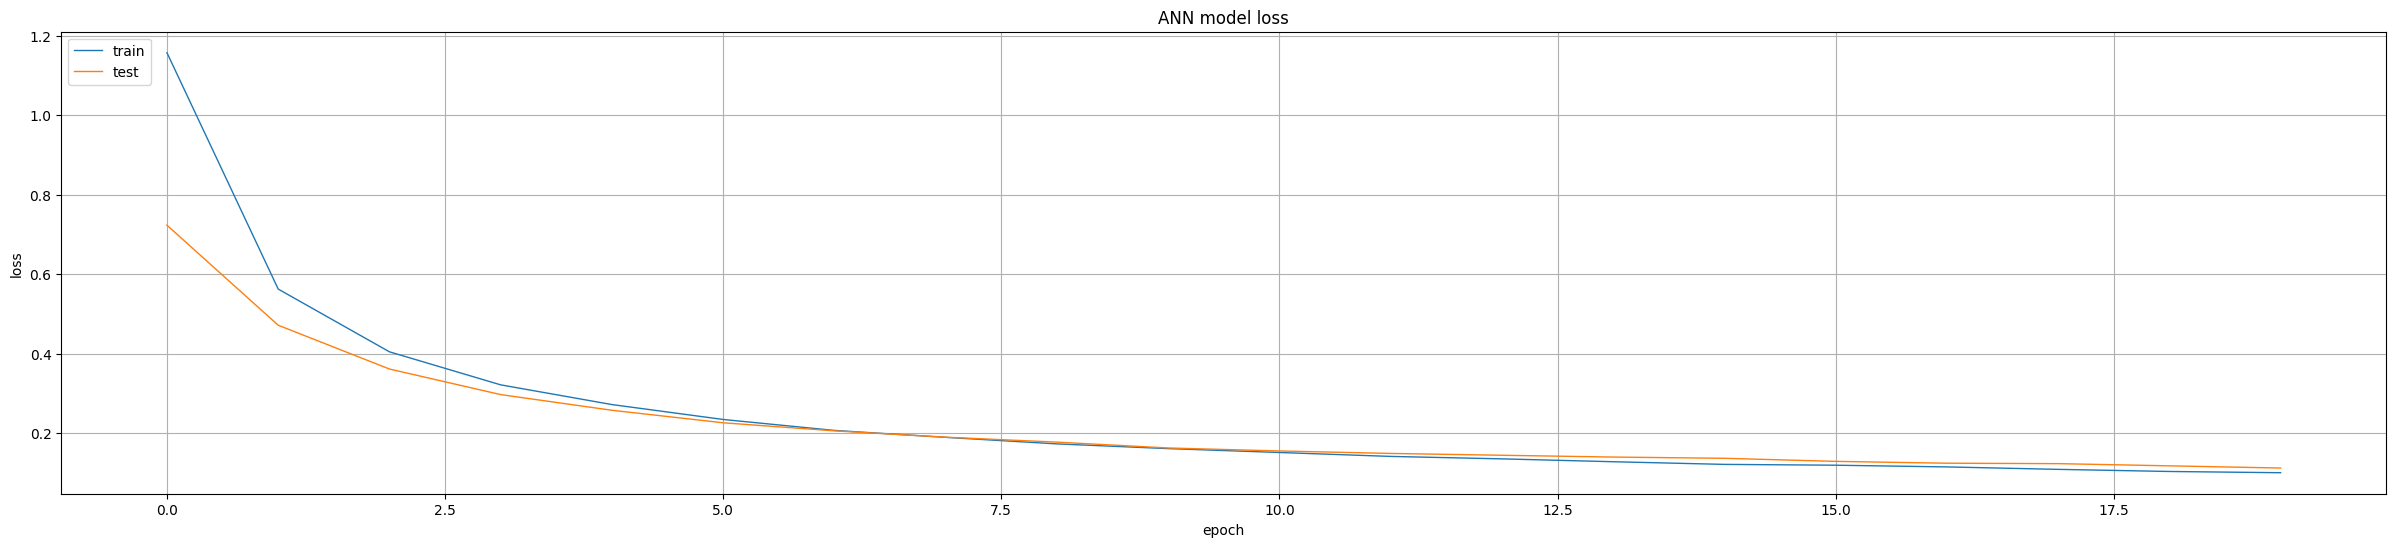

In [25]:

# training loss at each epoch
plt.plot(history.history['loss'])

# validation loss at each epoch (on a separate set of data not seen during training)
plt.plot(history.history['val_loss'])

plt.title('ANN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for accuracy

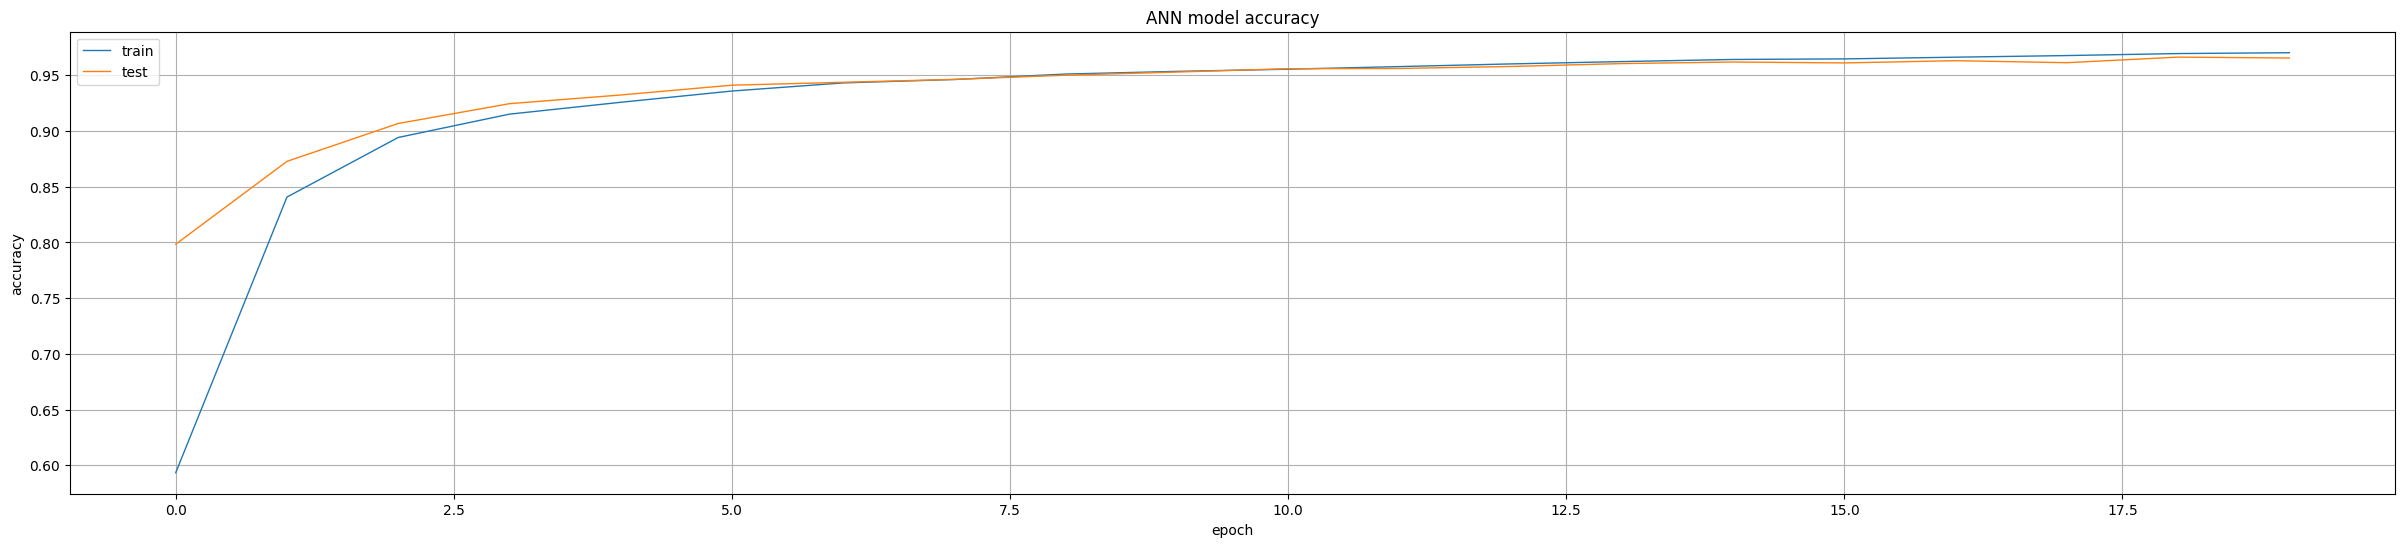

In [26]:

# training accuracy at each epoch
plt.plot(history.history['accuracy'])

# # validation accuracy at each epoch (on a separate set of data not seen during training)
plt.plot(history.history['val_accuracy'])

plt.title('ANN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Test Loss & Test accuracy

In [27]:
score = ANNmodel.evaluate(test_x, test_y)

print('Test Loss:', score[0])
print('Test accuracy:', score[1])

157/157 [==============================] - 0s 2ms/step - loss: 0.1119 - accuracy: 0.9656
Test Loss: 0.11190205067396164
Test accuracy: 0.9656000137329102


# confusion matrix

157/157 [==============================] - 0s 2ms/step


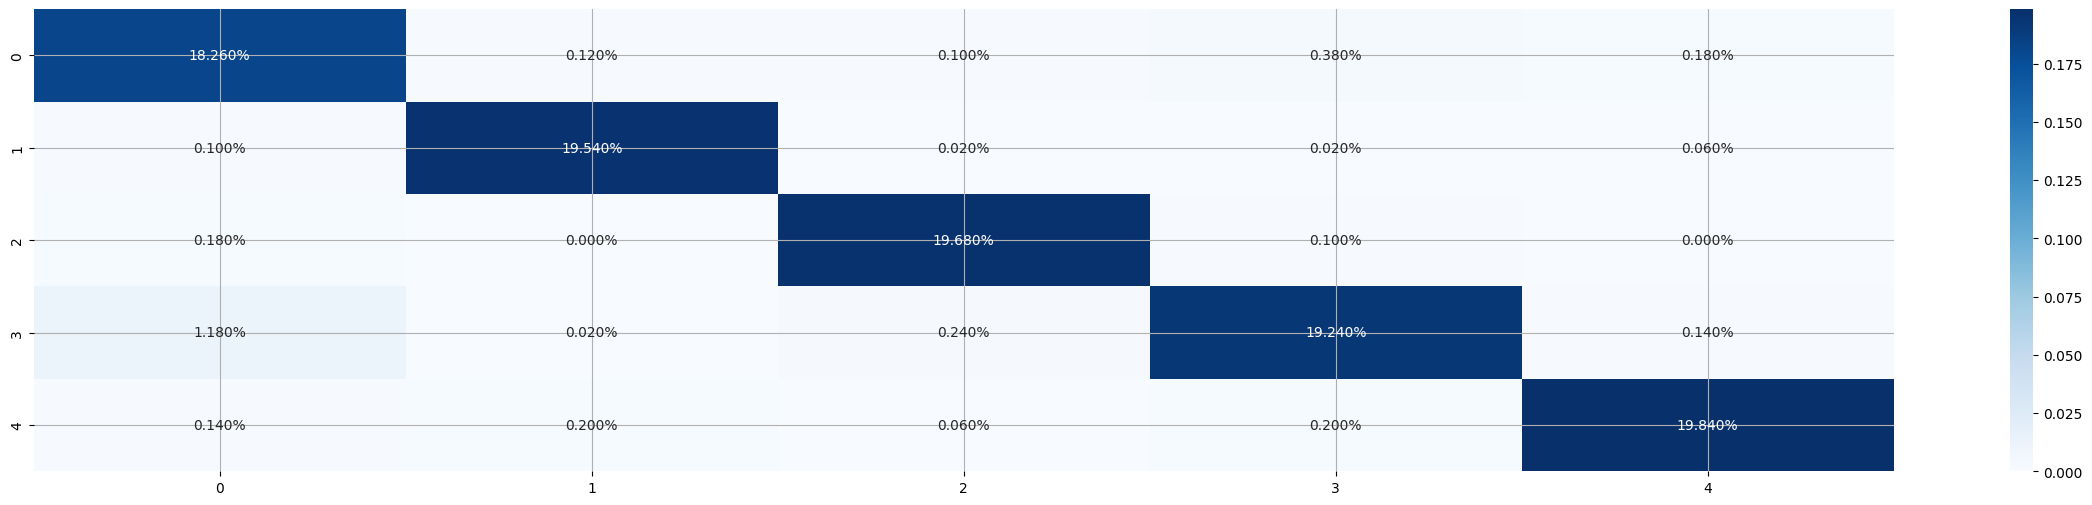

In [28]:
# confusion matrix to visualize the performance of neural network model on the test set

y_true=[]
for element in test_y:
    y_true.append(np.argmax(element))
prediction_proba=ANNmodel.predict(test_x)
prediction=np.argmax(prediction_proba,axis=1)

custCnnConfMat = confusion_matrix(y_true, prediction)
sns.heatmap(custCnnConfMat/np.sum(custCnnConfMat), annot=True,fmt='.3%', cmap='Blues')

plt.savefig('custCnnconfMat.png')

# precision

**Precision= (True Positives) / (True Positives + False Positives)**


true positives to the sum of true positives and false positives

A higher precision indicates a lower rate of false positives, implying that the positive predictions made by the model are more trustworthy

In [29]:
from sklearn.metrics import precision_score

# Assuming y_true contains true labels and prediction contains predicted labels

# Compute precision for each class
precision_per_class = precision_score(y_true, prediction, average=None)

# Compute average precision (micro-averaging)
# regardless of the class it belongs to
average_precision_micro = precision_score(y_true, prediction, average='micro')

# Compute average precision (macro-averaging)
# calculates the metric independently for each class and then takes the average across all classes
average_precision_macro = precision_score(y_true, prediction, average='macro')

# Print the results
print('Precision per class:', precision_per_class)
# print('Average Precision (Micro):', average_precision_micro)
print('Average Precision (Macro):', average_precision_macro)

Precision per class: [0.91943605 0.98289738 0.97910448 0.96489468 0.98120673]
Average Precision (Macro): 0.9655078648700691


# F1 score

**F1=2× (Precision×Recall) / (Precision + Recall)**

where a higher score indicates better performance. It provides a balance between precision and recall, making it a useful metric in situations where both false positives and false negatives are important considerations

In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming y_true contains true labels and prediction contains predicted labels

# Compute F1 score for each class
f1_per_class = f1_score(y_true, prediction, average=None)

# Compute average F1 score (micro-averaging)
average_f1_micro = f1_score(y_true, prediction, average='micro')

# Compute average F1 score (macro-averaging)
average_f1_macro = f1_score(y_true, prediction, average='macro')

# Print the results
print('F1 score per class:', f1_per_class)
# print('Average F1 Score (Micro):', average_f1_micro)
print('Average F1 Score (Macro):', average_f1_macro)

F1 score per class: [0.93881748 0.98637052 0.98252621 0.94406281 0.97589769]
Average F1 Score (Macro): 0.9655349412324


# Recall

**Recall= (True Positives) / (True Positives + False Negatives)**

it is crucial to have high recall to ensure that all instances of a disease are detected, even if it leads to some false positives


In [31]:
from sklearn.metrics import recall_score

# Assuming y_true contains true labels and y_pred contains predicted labels
# Make sure to convert your labels to the appropriate format (e.g., one-hot encoding)

# Compute recall for each class
recall_per_class = recall_score(y_true, prediction, average=None)

# Compute average recall (micro-averaging)
average_recall_micro = recall_score(y_true, prediction, average='micro')

# Compute average recall (macro-averaging)
average_recall_macro = recall_score(y_true, prediction, average='macro')

# Print the results
print('Recall per class:', recall_per_class)
# print('Average Recall (Micro):', average_recall_micro)
print('Average Recall (Macro):', average_recall_macro)

Recall per class: [0.95903361 0.98986829 0.98597194 0.92411143 0.97064579]
Average Recall (Macro): 0.965926213790685


# Accuracy

**Accuracy= (True Positives + True Negatives) / Total Instances**

evaluate the overall correctness of a classification model


In [32]:
from sklearn.metrics import accuracy_score

# Assuming y_true contains true labels and y_pred contains predicted labels
# Make sure to convert your labels to the appropriate format (e.g., one-hot encoding)

# Compute accuracy
accuracy = accuracy_score(y_true, prediction)

# Print the result
print('Accuracy:', accuracy)

Accuracy: 0.9656


# ------------------------------------------------------------------------------------------
# DNN
DNN is a specific type of ANN with multiple hidden layers

# Creating the Model

In [33]:
# Instanciate an empty model
DNNmodel = Sequential()

# Input shape = N = 360

# regularization is a technique used to prevent overfitting (don't make your weights too big!) 
# additional term added to the loss function during the training of a machine learning model

# Hidden Layers (Dense Layer with ReLU Activation) adds a dense (fully connected) layer to the model
DNNmodel.add(Dense(512, bias_regularizer=regularizers.l2(0.0001), input_shape=(360,), activation='relu'))
DNNmodel.add(Dense(1024, bias_regularizer=regularizers.l2(0.0001), activation='relu'))
DNNmodel.add(Dense(512, bias_regularizer=regularizers.l2(0.0001), activation='relu'))
DNNmodel.add(Dense(128, bias_regularizer=regularizers.l2(0.0001), activation='relu'))

# Output Layer (Dense Layer with Softmax Activation) adds the output layer to the model with 5 units
DNNmodel.add(Dense(5, bias_regularizer=regularizers.l2(0.0001)))

#used for multi-class classification
DNNmodel.add(Softmax())

# number of trainable parameters, the input and output shapes of each layer, and the total number of parameters in the model
DNNmodel.summary()


# Each unit in the dense layer has its own weight for each input feature + one bias term
# number of parameters for this layer is (number of input features + 1) * number of units.
# (360 + 1) * 512 = 184,832 parameters
# (512 + 1) * 1024 = 525,312
# (1024 + 1) * 512 = 524,800
# (512 + 1) * 128 = 65,664
# (128 + 1) * 5 = 645 parameters

# Each parameter represents a weight or bias value that the model will adjust during the training process to learn the patterns in the data

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               184832    
                                                                 
 dense_3 (Dense)             (None, 1024)              525312    
                                                                 
 dense_4 (Dense)             (None, 512)               524800    
                                                                 
 dense_5 (Dense)             (None, 128)               65664     
                                                                 
 dense_6 (Dense)             (None, 5)                 645       
                                                                 
 softmax_1 (Softmax)         (None, 5)                 0         
                                                                 
Total params: 1301253 (4.96 MB)
Trainable params: 1301

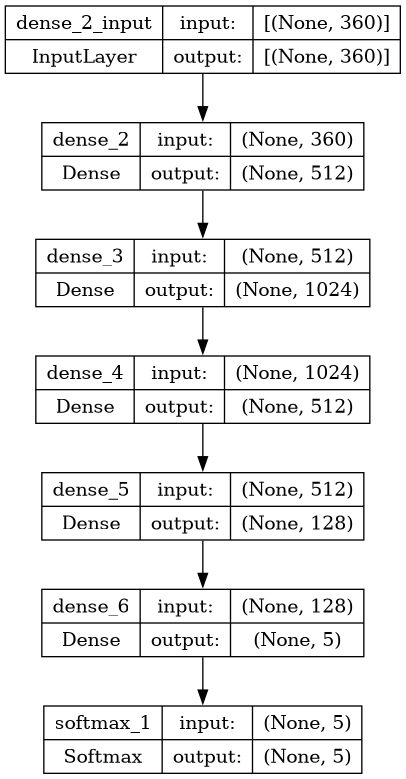

In [34]:
from tensorflow.keras.utils import plot_model

plot_model(DNNmodel, show_shapes=True, to_file='model_plot.png')

In [35]:
# loss function is used to : y-y'=0
# categorical cross-entropy loss measures the dissimilarity between the true distribution and the predicted distribution

# The accuracy metric represents the proportion of correctly classified samples

# optimizer is responsible for minimizing the loss function by adjusting the model parameters during the training process

DNNmodel.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train and test

In [36]:
# train_x : the input data (features) for training the model
# train_y : the target data (labels) corresponding to the input data
# batch_size : the number of samples used in each iteration (gradient update) during training
            # the model will be updated after processing each batch of 1000 samples
# epochs : the number of times the model will iterate over the entire training dataset
# verbose : progress bar is displayed during training, showing the completion of each epoch
# validation_data : how well the model generalizes to unseen data

history = DNNmodel.fit(train_x, train_y, batch_size=1000, epochs=20, verbose=1, validation_data=(test_x, test_y))

Epoch 1/20
20/20 [==============================] - 2s 78ms/step - loss: 0.6643 - accuracy: 0.7641 - val_loss: 0.2397 - val_accuracy: 0.9186
Epoch 2/20
20/20 [==============================] - 1s 67ms/step - loss: 0.1757 - accuracy: 0.9398 - val_loss: 0.1405 - val_accuracy: 0.9586
Epoch 3/20
20/20 [==============================] - 1s 67ms/step - loss: 0.1122 - accuracy: 0.9610 - val_loss: 0.1084 - val_accuracy: 0.9658
Epoch 4/20
20/20 [==============================] - 1s 65ms/step - loss: 0.0829 - accuracy: 0.9719 - val_loss: 0.0876 - val_accuracy: 0.9714
Epoch 5/20
20/20 [==============================] - 1s 65ms/step - loss: 0.0674 - accuracy: 0.9778 - val_loss: 0.0801 - val_accuracy: 0.9770
Epoch 6/20
20/20 [==============================] - 1s 65ms/step - loss: 0.0536 - accuracy: 0.9827 - val_loss: 0.0746 - val_accuracy: 0.9758
Epoch 7/20
20/20 [==============================] - 1s 66ms/step - loss: 0.0487 - accuracy: 0.9847 - val_loss: 0.0758 - val_accuracy: 0.9794
Epoch 8/20
20

# summarize history for loss

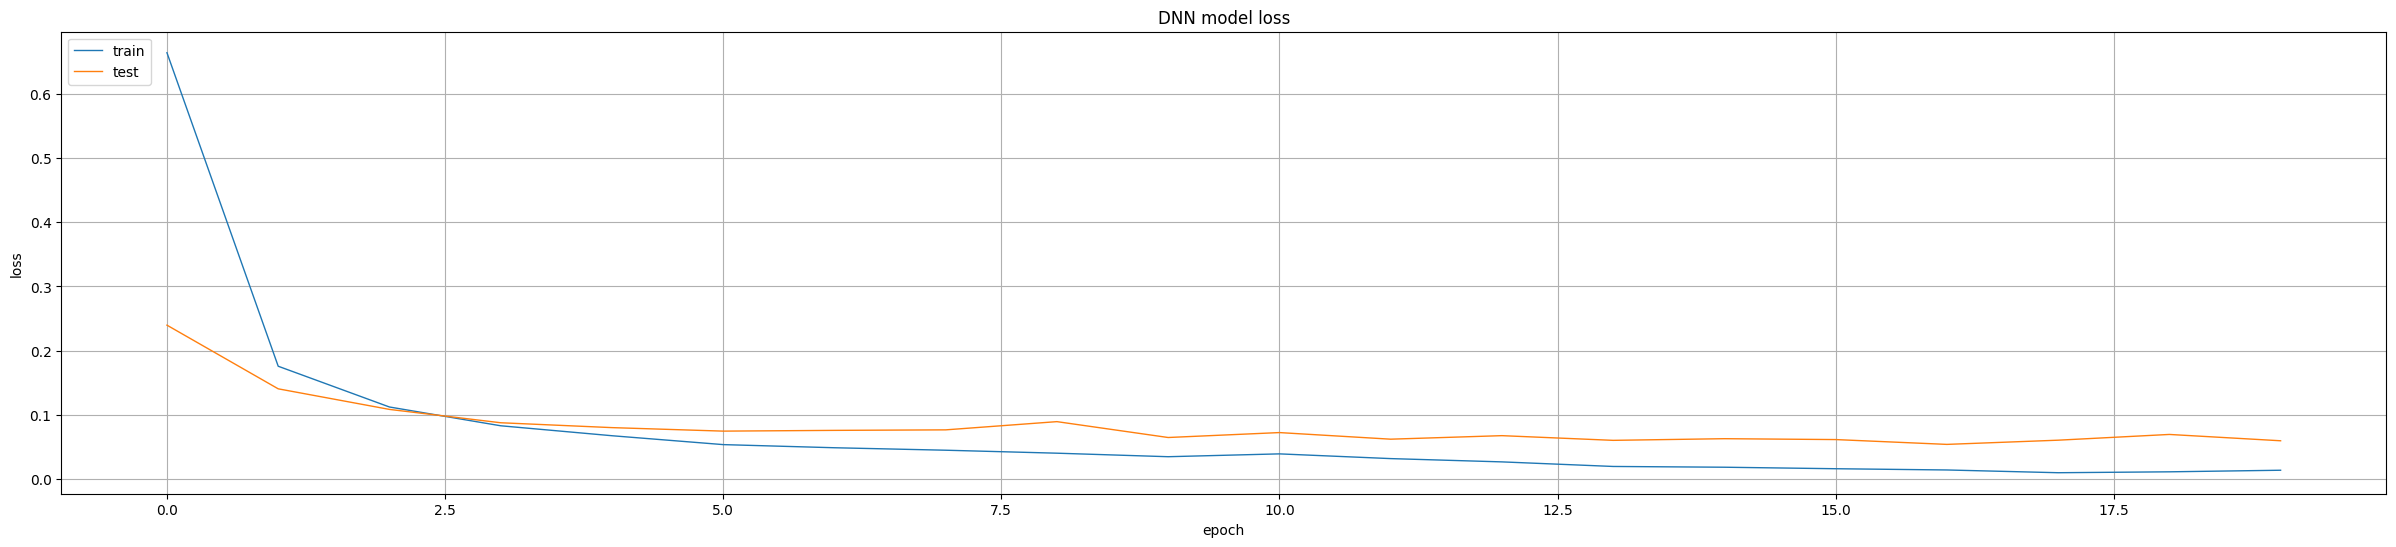

In [37]:

# training loss at each epoch
plt.plot(history.history['loss'])

# validation loss at each epoch (on a separate set of data not seen during training)
plt.plot(history.history['val_loss'])

plt.title('DNN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for accuracy

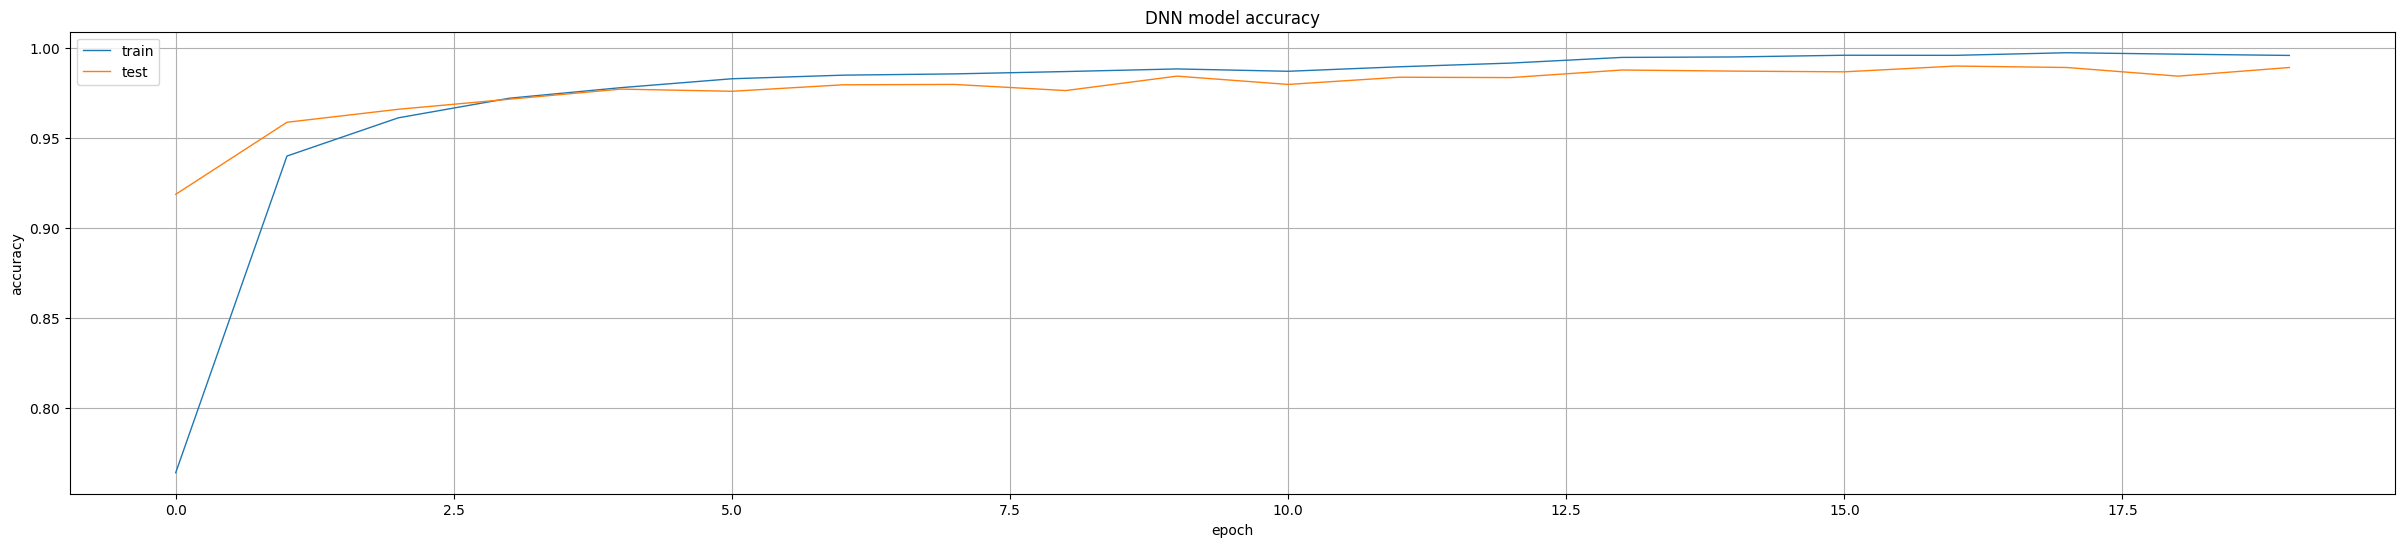

In [38]:

# training accuracy at each epoch
plt.plot(history.history['accuracy'])

# validation accuracy at each epoch (on a separate set of data not seen during training)
plt.plot(history.history['val_accuracy'])

plt.title('DNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Test Loss & Test Accuracy

In [39]:
score = DNNmodel.evaluate(test_x, test_y)

print('Test Loss:', score[0])
print('Test accuracy:', score[1])

157/157 [==============================] - 1s 5ms/step - loss: 0.0596 - accuracy: 0.9890
Test Loss: 0.05957438796758652
Test accuracy: 0.9890000224113464


# confusion matrix

157/157 [==============================] - 1s 5ms/step


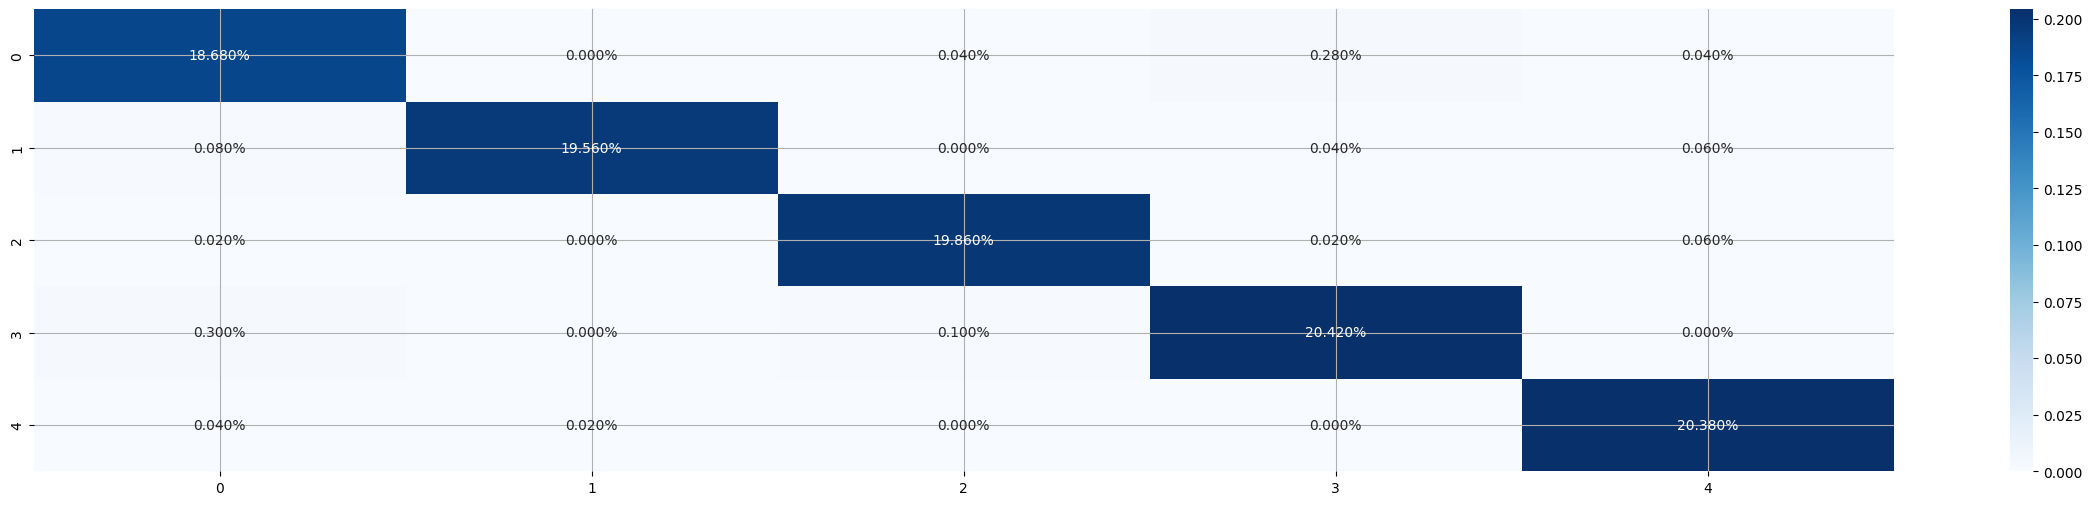

In [40]:
# confusion matrix and a heatmap to visualize the performance of neural network model on the test set
y_true=[]
for element in test_y:
    y_true.append(np.argmax(element))
prediction_proba=DNNmodel.predict(test_x)
prediction=np.argmax(prediction_proba,axis=1)

custCnnConfMat = confusion_matrix(y_true, prediction)
sns.heatmap(custCnnConfMat/np.sum(custCnnConfMat), annot=True,fmt='.3%', cmap='Blues')
plt.savefig('custCnnconfMat2.png')

# precision


**Precision= (True Positives) / (True Positives + False Positives)**


true positives to the sum of true positives and false positives


A higher precision indicates a lower rate of false positives, implying that the positive predictions made by the model are more trustworthy

In [41]:
from sklearn.metrics import precision_score

# Assuming y_true contains true labels and prediction contains predicted labels

# Compute precision for each class
precision_per_class = precision_score(y_true, prediction, average=None)

# Compute average precision (micro-averaging)
# regardless of the class it belongs to
average_precision_micro = precision_score(y_true, prediction, average='micro')

# Compute average precision (macro-averaging)
# calculates the metric independently for each class and then takes the average across all classes
average_precision_macro = precision_score(y_true, prediction, average='macro')

# Print the results
print('Precision per class:', precision_per_class)
# print('Average Precision (Micro):', average_precision_micro)
print('Average Precision (Macro):', average_precision_macro)

Precision per class: [0.97698745 0.99897855 0.993      0.98362235 0.99221032]
Average Precision (Macro): 0.9889597338475422


# F1 score
**F1=2× (Precision×Recall) / (Precision + Recall)**

where a higher score indicates better performance. It provides a balance between precision and recall, making it a useful metric in situations where both false positives and false negatives are important considerations

In [42]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming y_true contains true labels and prediction contains predicted labels

# Compute F1 score for each class
f1_per_class = f1_score(y_true, prediction, average=None)

# Compute average F1 score (micro-averaging)
average_f1_micro = f1_score(y_true, prediction, average='micro')

# Compute average F1 score (macro-averaging)
average_f1_macro = f1_score(y_true, prediction, average='macro')

# Print the results
print('F1 score per class:', f1_per_class)
# print('Average F1 Score (Micro):', average_f1_micro)
print('Average F1 Score (Macro):', average_f1_macro)

F1 score per class: [0.97903564 0.99491353 0.99399399 0.98220298 0.99463153]
Average F1 Score (Macro): 0.9889555346389146


# Recall

**Recall= (True Positives) / (True Positives + False Negatives)**

it is crucial to have high recall to ensure that all instances of a disease are detected, even if it leads to some false positives


In [43]:
from sklearn.metrics import recall_score

# Assuming y_true contains true labels and y_pred contains predicted labels
# Make sure to convert your labels to the appropriate format (e.g., one-hot encoding)

# Compute recall for each class
recall_per_class = recall_score(y_true, prediction, average=None)

# Compute average recall (micro-averaging)
average_recall_micro = recall_score(y_true, prediction, average='micro')

# Compute average recall (macro-averaging)
average_recall_macro = recall_score(y_true, prediction, average='macro')

# Print the results
print('Recall per class:', recall_per_class)
# print('Average Recall (Micro):', average_recall_micro)
print('Average Recall (Macro):', average_recall_macro)

Recall per class: [0.98109244 0.99088146 0.99498998 0.9807877  0.99706458]
Average Recall (Macro): 0.9889632318576558


# Accuracy

**Accuracy= (True Positives + True Negatives) / Total Instances**

evaluate the overall correctness of a classification model


In [44]:
from sklearn.metrics import accuracy_score

# Assuming y_true contains true labels and y_pred contains predicted labels
# Make sure to convert your labels to the appropriate format (e.g., one-hot encoding)

# Compute accuracy
accuracy = accuracy_score(y_true, prediction)

# Print the result
print('Accuracy:', accuracy)

Accuracy: 0.989


# ----------------------------------------------------------------------------------------
# CNN

# Creating the Model

In [45]:
# an empty model
CNNmodel = Sequential()

# Adding a Convolution Layer C1
# Input shape = N = (360 x 1)
# No. of filters  = 16 : Each filter is responsible for learning different features from the input
# Filter size = f = (13 x 1) : the region of the input data that a single filter "sees"
# Padding = true : padding means the output size will be the same as the input size (add with zeros if necessary)
# Strides = S = 1

# N=length of the input sequence // f=filter size (kernel size) // P=the padding size // S=stride
# Size of each feature map in C1 is (N-f+2P)/S +1 = 360-13+2*6 +1 = 360
# No. of parameters between input layer and C1 = [kernal size(weight) * input channel + 1(bias)] * filters = (13*1 + 1)*16 = 224
CNNmodel.add(Conv1D(filters=16, kernel_size=13, padding='same', activation='relu',input_shape=(360, 1)))


# Adding an Average Pooling Layer P2
# Input shape = N = (360 x 16)
# No. of filters = 16
# Filter size = f = (3 x 1) : computes the average value within windows of size 3
# Padding = P = 0
# Strides = S = 2
# Size of each feature map in P2 is (N-f+2P+1)/S = (360-3+0+1)/2 = 179
# No. of parameters between C1 and P2 = (1+1)*16 = 32
CNNmodel.add(AvgPool1D(pool_size=3, strides=2))


# -------------------------------------------------------------------------------------------------------------------

# Adding a Convolution Layer C3
# Input shape = N = (179 x 16)
# No. of filters  = 32 : Each filter is responsible for learning different features from the input
# Filter size = f = (15 x 1) : the region of the input data that a single filter "sees"
# Padding = true
# Strides = S = 1
# Size of each feature map in C1 is (N-f+2P)/S +1 = 179-15+2*7 +1 = 360
# No. of parameters between input layer and C1 = (15*1 + 1)*32 = 512
CNNmodel.add(Conv1D(filters=32, kernel_size=15, padding='same', activation='relu'))


# Adding an Average Pooling Layer P4
# Input shape = N = (179 x 32)
# No. of filters = 32
# Filter size = f = (3 x 1)
# Padding = P = 0
# Strides = S = 2
# Size of each feature map in S2 is (N-f+2P+1)/S = (179-3+0+1)/2 = 89
# No. of parameters between C3 and P4 = (1+1)*32 = 64
CNNmodel.add(AvgPool1D(pool_size=3, strides=2))


# ------------------------------------------------------------------------------------------------------------------

# Adding a Convolution Layer C5
# Input shape = N = (89 x 32)
# No. of filters  = 64 : Each filter is responsible for learning different features from the input
# Filter size = f = (17 x 1) : the region of the input data that a single filter "sees"
# Padding = true
# Strides = S = 1
# Size of each feature map in C5 is (N-f+2P)/S +1 = 89-17+2*8 +1 = 89
# No. of parameters between input layer and C5 = (17*1 + 1)*64 = 1152
CNNmodel.add(Conv1D(filters=64, kernel_size=17, padding='same', activation='relu'))


# Adding an Average Pooling Layer P6
# Input shape = N = (89 x 64)
# No. of filters = 64
# Filter size = f = (3 x 1)
# Padding = P = 0
# Strides = S = 2
# Size of each feature map in P6 is (N-f+2P+1)/S = (89-3+0+1)/2 = 44
# No. of parameters between C5 and P6 = (1+1)*64 = 128
CNNmodel.add(AvgPool1D(pool_size=3, strides=2))


# ---------------------------------------------------------------------------------------------------------------------

# Adding a Convolution Layer C7
# Input shape = N = (44 x 64)
# No. of filters  = 128 : Each filter is responsible for learning different features from the input
# Filter size = f = (19 x 1) : the region of the input data that a single filter "sees"
# Padding = true
# Strides = S = 1
# Size of each feature map in C7 is (N-f+2P)/S +1 = 44-19+2*9 +1 = 44
# No. of parameters between input layer and C7 = (19*1 + 1)*128 = 2560
CNNmodel.add(Conv1D(filters=128, kernel_size=19, padding='same', activation='relu'))


# Adding an Average Pooling Layer P8
# Input shape = N = (44 x 128)
# No. of filters = 128
# Filter size = f = (3 x 1)
# Padding = P = 0
# Strides = S = 2
# Size of each feature map in p8 is (N-f+2P+1)/S = (44-3+0+1)/2 = 21
# No. of parameters between C7 and P8 = (1+1)*128 = 256
CNNmodel.add(AvgPool1D(pool_size=3, strides=2))


# -------------------------------------------------------------------------------------------------------------------

# Flattening the layer : a multi-dimensional tensor and converts it into a one-dimensional array
# input=(21*128*1)
# There would be 128*(21*1) = 2688 neurons
CNNmodel.add(Flatten())


# Dropout the layer D9 : meaning half of the input units will be randomly set to zero during each update
# prevent overfitting
CNNmodel.add(Dropout(0.5))



# Adding a Dense layer with regularization l2(0.0001)# D10
# No. of inputs = 2688
# No. of outputs = 35
# No. of parameters = 2688 x 35 + 35 = 94115
CNNmodel.add(Dense(35,kernel_regularizer=regularizers.l2(0.0001), bias_regularizer=regularizers.l2(0.0001)))



# Adding a Dense layer with regularization l2(0.0001)# D11
# No. of inputs = 35
# No. of outputs = 5
# No. of parameters = 35*5 + 5 = 180
CNNmodel.add(Dense(5,kernel_regularizer=regularizers.l2(0.0001), bias_regularizer=regularizers.l2(0.0001)))



# Adding a Softmax layer S12
# No. of inputs = 5
# No. of outputs = 5
CNNmodel.add(Softmax())


CNNmodel.summary()

# C1 = [kernal size(weight) * input channel + 1(bias)] * filters = (13*1 + 1)*16 = 224
# C3 = (15 * 16 + 1) * 32 = 7712
# C5 = (17 * 32 + 1) * 64 = 34880
# C7 = (19 * 64 + 1) * 128 = 155776

# Parameters=(input units×output units)+output units:
# D10 = (2688 × 35) + 35 = 94,115
# D11 = (35 x 5) + 5 = 180

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 360, 16)           224       
                                                                 
 average_pooling1d (Average  (None, 179, 16)           0         
 Pooling1D)                                                      
                                                                 
 conv1d_1 (Conv1D)           (None, 179, 32)           7712      
                                                                 
 average_pooling1d_1 (Avera  (None, 89, 32)            0         
 gePooling1D)                                                    
                                                                 
 conv1d_2 (Conv1D)           (None, 89, 64)            34880     
                                                                 
 average_pooling1d_2 (Avera  (None, 44, 64)           

In [46]:
# loss function is used to : y-y'=0
# categorical cross-entropy loss measures the dissimilarity between the true distribution and the predicted distribution

# The accuracy metric represents the proportion of correctly classified samples

# optimizer is responsible for minimizing the loss function by adjusting the model parameters during the training process

CNNmodel.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train & Test

In [47]:
# train_x : the input data (features) for training the model
# train_y : the target data (labels) corresponding to the input data
# batch_size : the number of samples used in each iteration (gradient update) during training
            # the model will be updated after processing each batch of 1000 samples
# epochs : the number of times the model will iterate over the entire training dataset
# verbose : progress bar is displayed during training, showing the completion of each epoch
# validation_data : how well the model generalizes to unseen data

history = CNNmodel.fit(train_x, train_y, batch_size=1000, epochs=20, verbose=1, validation_data=(test_x, test_y))

Epoch 1/20
20/20 [==============================] - 14s 637ms/step - loss: 0.9264 - accuracy: 0.6479 - val_loss: 0.4756 - val_accuracy: 0.8508
Epoch 2/20
20/20 [==============================] - 12s 627ms/step - loss: 0.4101 - accuracy: 0.8702 - val_loss: 0.3084 - val_accuracy: 0.9216
Epoch 3/20
20/20 [==============================] - 12s 617ms/step - loss: 0.2760 - accuracy: 0.9156 - val_loss: 0.2287 - val_accuracy: 0.9328
Epoch 4/20
20/20 [==============================] - 12s 611ms/step - loss: 0.2109 - accuracy: 0.9332 - val_loss: 0.1777 - val_accuracy: 0.9492
Epoch 5/20
20/20 [==============================] - 12s 622ms/step - loss: 0.1689 - accuracy: 0.9478 - val_loss: 0.1554 - val_accuracy: 0.9562
Epoch 6/20
20/20 [==============================] - 12s 609ms/step - loss: 0.1479 - accuracy: 0.9536 - val_loss: 0.1364 - val_accuracy: 0.9610
Epoch 7/20
20/20 [==============================] - 13s 640ms/step - loss: 0.1345 - accuracy: 0.9578 - val_loss: 0.1241 - val_accuracy: 0.9650

# summarize history for loss

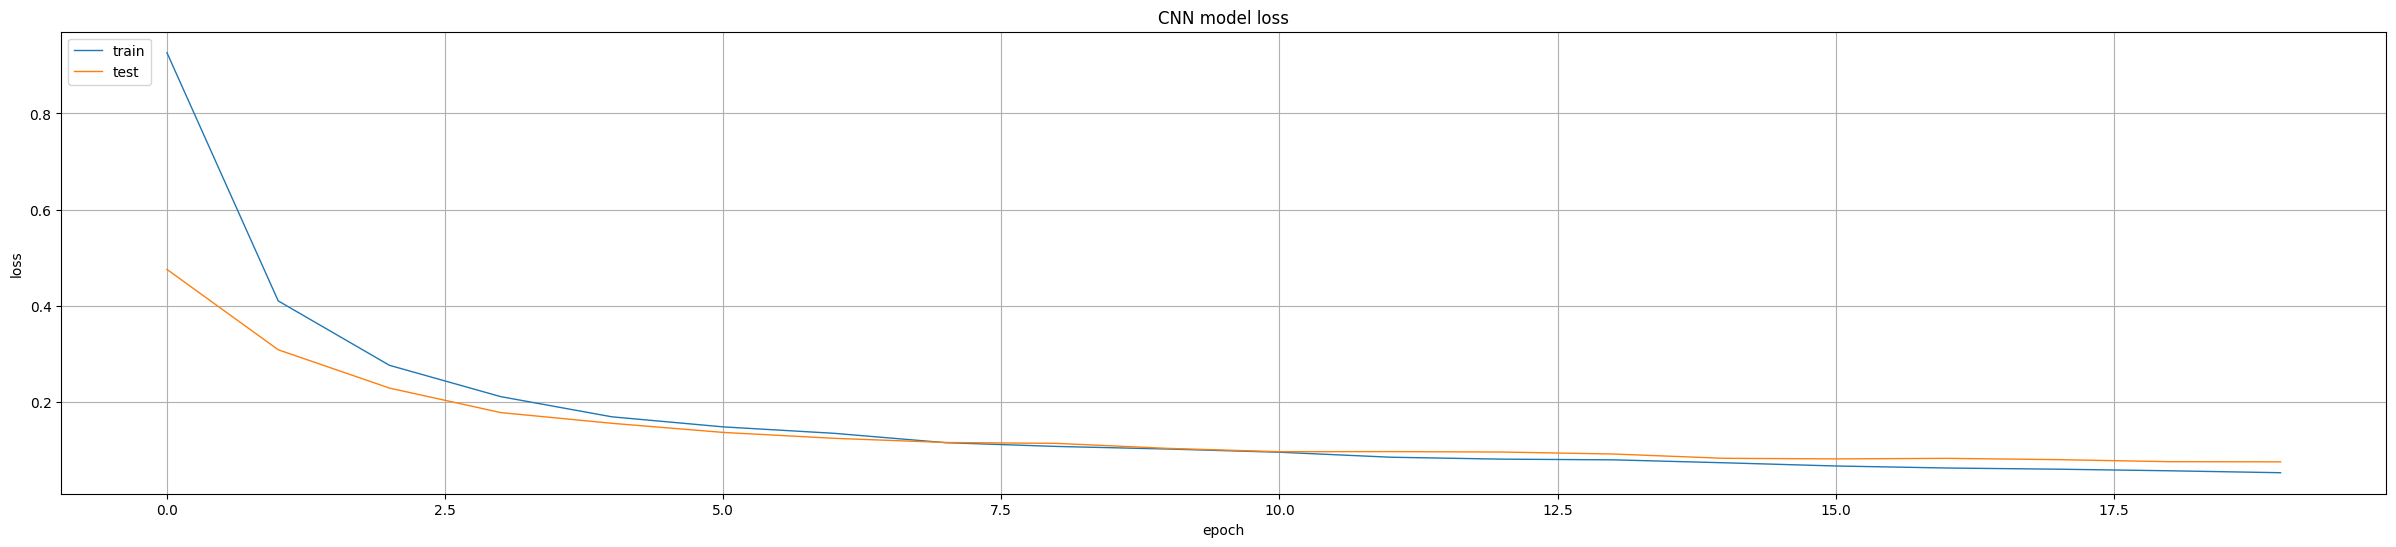

In [48]:

# training loss at each epoch
plt.plot(history.history['loss'])

# validation loss at each epoch (on a separate set of data not seen during training)
plt.plot(history.history['val_loss'])

plt.title('CNN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for accuracy

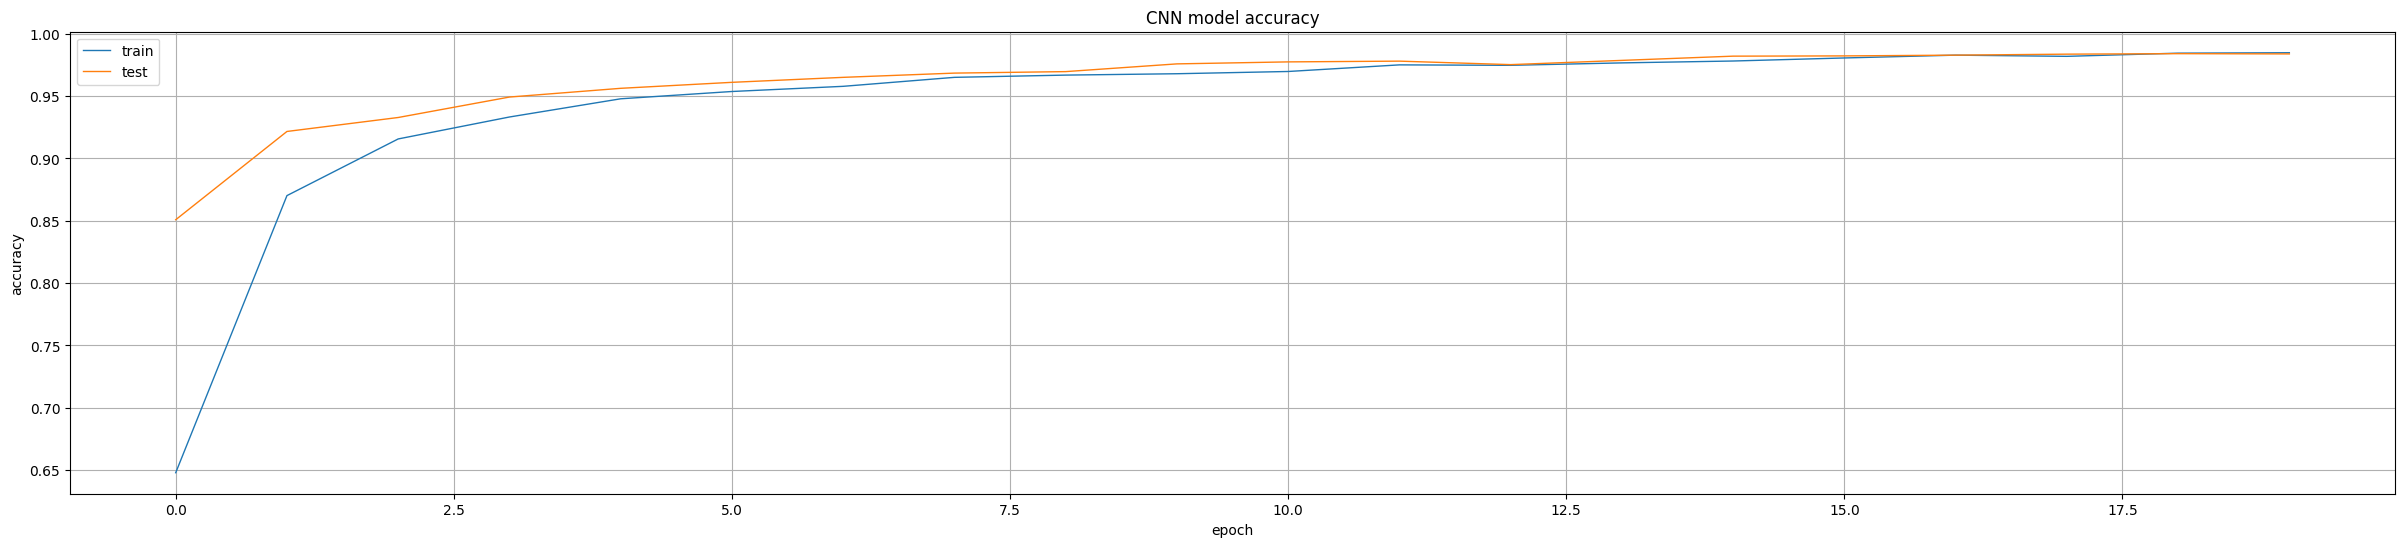

In [49]:

# training accuracy at each epoch
plt.plot(history.history['accuracy'])

# validation accuracy at each epoch (on a separate set of data not seen during training)
plt.plot(history.history['val_accuracy'])

plt.title('CNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Test loss & Test Accuracy

In [50]:
score = CNNmodel.evaluate(test_x, test_y)

print('Test Loss:', score[0])
print('Test accuracy:', score[1])

157/157 [==============================] - 2s 11ms/step - loss: 0.0752 - accuracy: 0.9838
Test Loss: 0.07522383332252502
Test accuracy: 0.9837999939918518


# confusion matrix

157/157 [==============================] - 2s 11ms/step


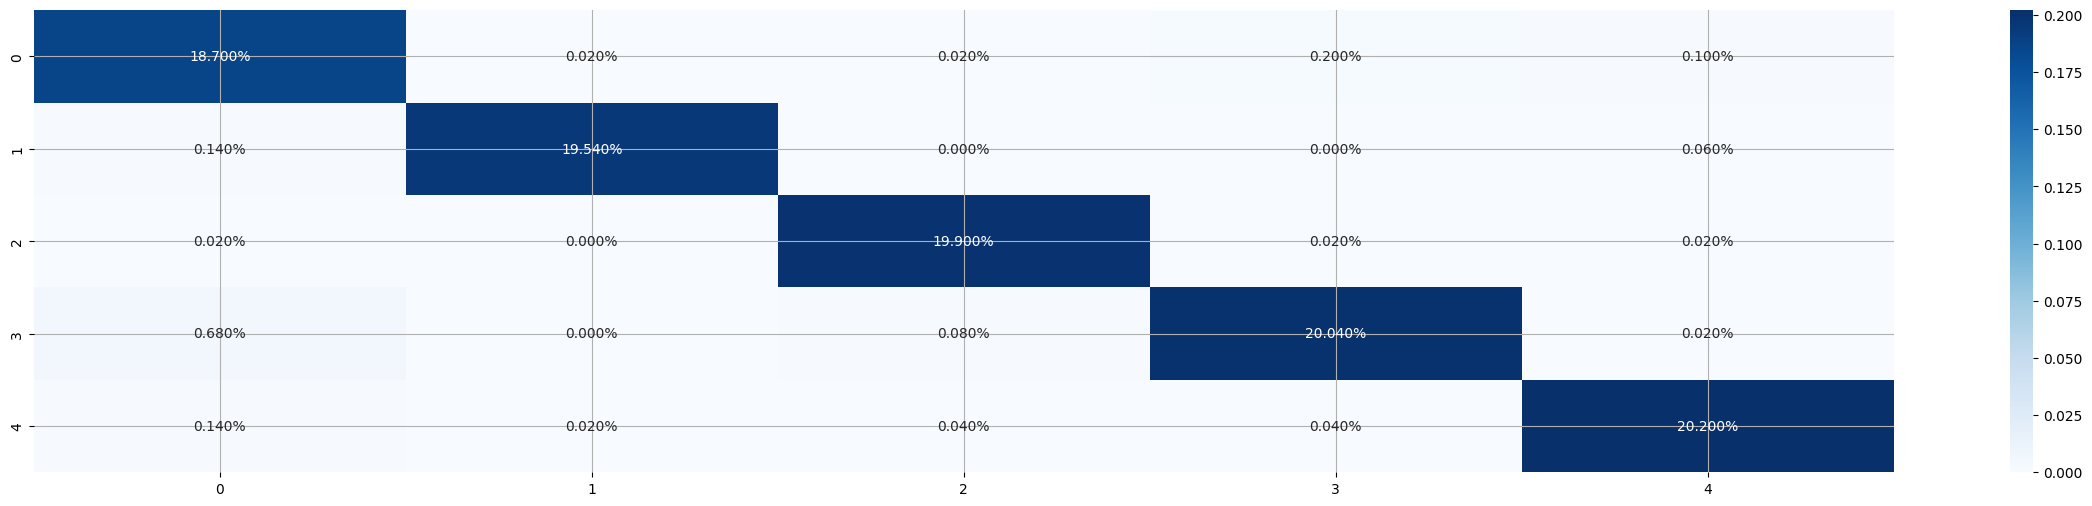

In [51]:
# confusion matrix to visualize the performance of neural network model on the test set
y_true=[]
for element in test_y:
    y_true.append(np.argmax(element))
prediction_proba=CNNmodel.predict(test_x)
prediction=np.argmax(prediction_proba,axis=1)

custCnnConfMat = confusion_matrix(y_true, prediction)
sns.heatmap(custCnnConfMat/np.sum(custCnnConfMat), annot=True,fmt='.3%', cmap='Blues')
plt.savefig('custCnnconfMat2.png')

# precision
**Precision= (True Positives) / (True Positives + False Positives)**

true positives to the sum of true positives and false positives

A higher precision indicates a lower rate of false positives, implying that the positive predictions made by the model are more trustworthy


In [52]:
from sklearn.metrics import precision_score

# Assuming y_true contains true labels and prediction contains predicted labels

# Compute precision for each class
precision_per_class = precision_score(y_true, prediction, average=None)

# Compute average precision (micro-averaging)
# regardless of the class it belongs to
average_precision_micro = precision_score(y_true, prediction, average='micro')

# Compute average precision (macro-averaging)
# calculates the metric independently for each class and then takes the average across all classes
average_precision_macro = precision_score(y_true, prediction, average='macro')

# Print the results
print('Precision per class:', precision_per_class)
# print('Average Precision (Micro):', average_precision_micro)
print('Average Precision (Macro):', average_precision_macro)

Precision per class: [0.95020325 0.9979571  0.99301397 0.98719212 0.99019608]
Average Precision (Macro): 0.9837125039654154


# F1 score
**F1=2× (Precision×Recall) / (Precision + Recall)**

where a higher score indicates better performance. It provides a balance between precision and recall, making it a useful metric in situations where both false positives and false negatives are important considerations

In [53]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming y_true contains true labels and prediction contains predicted labels

# Compute F1 score for each class
f1_per_class = f1_score(y_true, prediction, average=None)

# Compute average F1 score (micro-averaging)
average_f1_micro = f1_score(y_true, prediction, average='micro')

# Compute average F1 score (macro-averaging)
average_f1_macro = f1_score(y_true, prediction, average='macro')

# Print the results
print('F1 score per class:', f1_per_class)
# print('Average F1 Score (Micro):', average_f1_micro)
print('Average F1 Score (Macro):', average_f1_macro)

F1 score per class: [0.96590909 0.99389624 0.995      0.97470817 0.98922625]
Average F1 Score (Macro): 0.9837479493806469


# Recall
**Recall= (True Positives) / (True Positives + False Negatives)**

it is crucial to have high recall to ensure that all instances of a disease are detected, even if it leads to some false positives

In [54]:
from sklearn.metrics import recall_score

# Assuming y_true contains true labels and y_pred contains predicted labels
# Make sure to convert your labels to the appropriate format (e.g., one-hot encoding)

# Compute recall for each class
recall_per_class = recall_score(y_true, prediction, average=None)

# Compute average recall (micro-averaging)
average_recall_micro = recall_score(y_true, prediction, average='micro')

# Compute average recall (macro-averaging)
average_recall_macro = recall_score(y_true, prediction, average='macro')

# Print the results
print('Recall per class:', recall_per_class)
# print('Average Recall (Micro):', average_recall_micro)
print('Average Recall (Macro):', average_recall_macro)

Recall per class: [0.98214286 0.98986829 0.99699399 0.96253602 0.98825832]
Average Recall (Macro): 0.9839598945879265


# Accuracy
**Accuracy= (True Positives + True Negatives) / Total Instances**

evaluate the overall correctness of a classification model

In [55]:
from sklearn.metrics import accuracy_score

# Assuming y_true contains true labels and y_pred contains predicted labels
# Make sure to convert your labels to the appropriate format (e.g., one-hot encoding)

# Compute accuracy
accuracy = accuracy_score(y_true, prediction)

# Print the result
print('Accuracy:', accuracy)

Accuracy: 0.9838


# -------------------------------------------------------------------------------------
# KNN

# preprocessing step (for features) for classification

In [57]:
# select all rows and all columns up to the last column, excluding the last column (contains the target labels)
train_x = train.iloc[:,:train.shape[1]-1].values
test_x = test.iloc[:,:test.shape[1]-1].values

# the input shape may need to include a channel dimension
train_x = train_x.reshape(len(train_x), train_x.shape[1],1)
test_x = test_x.reshape(len(test_x), test_x.shape[1],1)

# (number of samples, number of features, channels)
print(np.shape(train_x), np.shape(test_x))


# (number of samples, number of features, channels)
nsamples, nx, ny = train_x.shape

#  flatten the features while keeping each sample separate : reshaping the train_x array from a 3D array into a 2D
d2_train_x = train_x.reshape((nsamples,nx*ny))

print("nsamples:", nsamples)
print("nx:", nx)
print("ny:", ny)

(20000, 360, 1) (5000, 360, 1)
nsamples: 20000
nx: 360
ny: 1


# preprocessing step (for labels) for classification

In [58]:
def label_encoder(array):
    
    #extracts the number of rows and columns from the input array
    rows, cols = array.shape
    print("rows:", rows)
    print("columns:", cols)
    
    #array label of zeros with a length equal to the number of rows
    label = np.zeros(rows)
    rows, cols = array.shape
    
    for i in range(rows):
        for j in range(cols):
            if(array[i][j] == 1):
                label[i] = j
    
    return label

# The function essentially simplifies the class representation for each sample
d1_train_y = label_encoder(train_y)

rows: 20000
columns: 5


# Creating the Model

In [59]:
from sklearn.neighbors import KNeighborsClassifier

# Creating the KNN Model
# when the model is asked to classify a new data point, it looks at the labels of the three training instances that are closest 
# to the given data point and assigns the class label that is most common among these three neighbors
KNNmodel = KNeighborsClassifier(n_neighbors=3)

# Training the Model
# d2_train_x represents the input features, and d1_train_y represents the corresponding class labels
KNNmodel.fit(d2_train_x,d1_train_y)

KNeighborsClassifier(n_neighbors=3)

In [60]:
# d1_test_y contains the class labels for the test set
d1_test_y = label_encoder(test_y)

rows: 5000
columns: 5


In [61]:
# d2_test_x contains the flattened version of the input features for the test set
nsamples, nx, ny = test_x.shape
d2_test_x = test_x.reshape((nsamples,nx*ny))

# Test

In [62]:
# predicts the class labels for the test set (d2_test_x) using the k-Nearest Neighbors (KNN) 
KNNpred = KNNmodel.predict(d2_test_x)

In [63]:
from sklearn import metrics



print(metrics.accuracy_score(d1_test_y, KNNpred))

0.972


# class labels

In [64]:
# contains the true class labels for the test set
d1_test_y

array([0., 0., 2., ..., 0., 4., 3.])

In [65]:
# contains the predicted class labels for the test set
KNNpred

array([0., 0., 2., ..., 0., 4., 3.])

# precision, recall, f1-score

In [66]:
from sklearn import metrics

# including precision, recall, f1-score, and support:occurrences of each class in the specified target variable for each class
print(metrics.classification_report(d1_test_y, KNNpred))

#   macro avg : This is the average of the metrics (precision, recall, F1-score) calculated for each class independently
# weighted avg : weighted by its support

              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95       952
         1.0       0.99      0.99      0.99       987
         2.0       0.96      0.99      0.98       998
         3.0       0.96      0.96      0.96      1041
         4.0       0.99      0.97      0.98      1022

    accuracy                           0.97      5000
   macro avg       0.97      0.97      0.97      5000
weighted avg       0.97      0.97      0.97      5000



# accuracy

In [67]:
print(metrics.accuracy_score(d1_test_y, KNNpred))

0.972


# Confusion Matrix

In [68]:
print(metrics.confusion_matrix(d1_test_y, KNNpred))

[[ 891    4   23   31    3]
 [   4  982    0    0    1]
 [   1    3  991    3    0]
 [  24    0   12 1001    4]
 [   9    7    4    7  995]]


<Axes: >

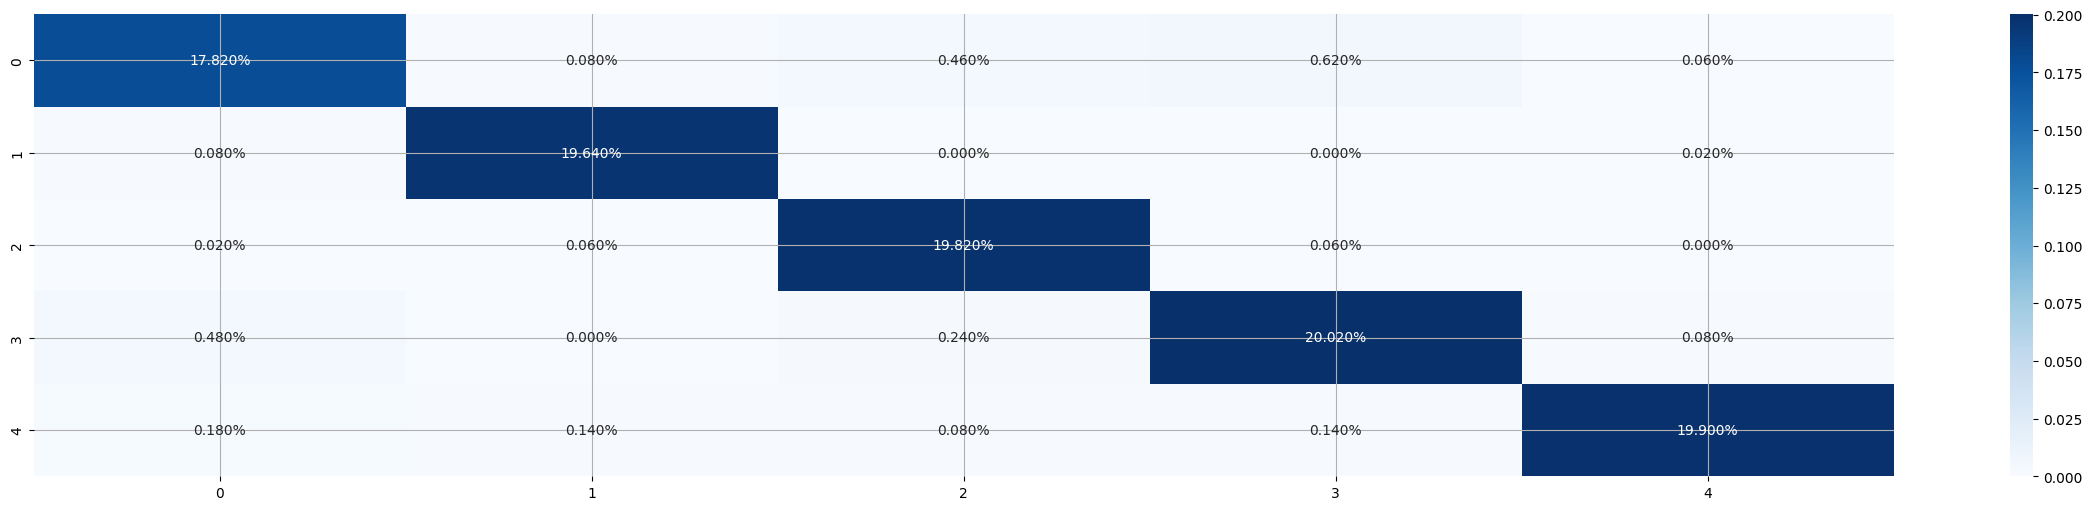

In [69]:
import seaborn as sns
sns.heatmap(metrics.confusion_matrix(d1_test_y, KNNpred)/np.sum(metrics.confusion_matrix(d1_test_y, KNNpred)), annot=True, fmt='.3%', cmap='Blues')

# -------------------------------------------------------------------------------------------
# DESICION TREE

# Train & Test

In [70]:
from sklearn import tree

# the randomness is reproducible. That is, if you run the same code with the same random_state, you should get the same results
# make the training process reproducible
dt = tree.DecisionTreeClassifier(random_state=0)

# Training the Decision Tree : d2_train_x as features and d1_train_y as labels
dt.fit(d2_train_x, d1_train_y)

# Making Predictions : test data (d2_test_x)
DTpred = dt.predict(d2_test_x)

# Accuracy

In [71]:
# compares true labels with predicted labels
print(metrics.accuracy_score(d1_test_y, DTpred))

0.9452


# precision, recall, f1-score

In [72]:
# including precision, recall, f1-score, and support:occurrences of each class in the specified target variable for each class
print(metrics.classification_report(d1_test_y, DTpred))

#   macro avg : This is the average of the metrics (precision, recall, F1-score) calculated for each class independently
# weighted avg : weighted by its support

              precision    recall  f1-score   support

         0.0       0.92      0.89      0.90       952
         1.0       0.96      0.95      0.96       987
         2.0       0.97      0.97      0.97       998
         3.0       0.93      0.96      0.94      1041
         4.0       0.95      0.95      0.95      1022

    accuracy                           0.95      5000
   macro avg       0.95      0.94      0.94      5000
weighted avg       0.95      0.95      0.95      5000



# confusion matrix

In [73]:
print(metrics.confusion_matrix(d1_test_y, DTpred))

[[ 846   14   16   51   25]
 [  21  936    1    8   21]
 [  11    3  968   11    5]
 [  24    6   10 1001    0]
 [  20   14    6    7  975]]


<Axes: >

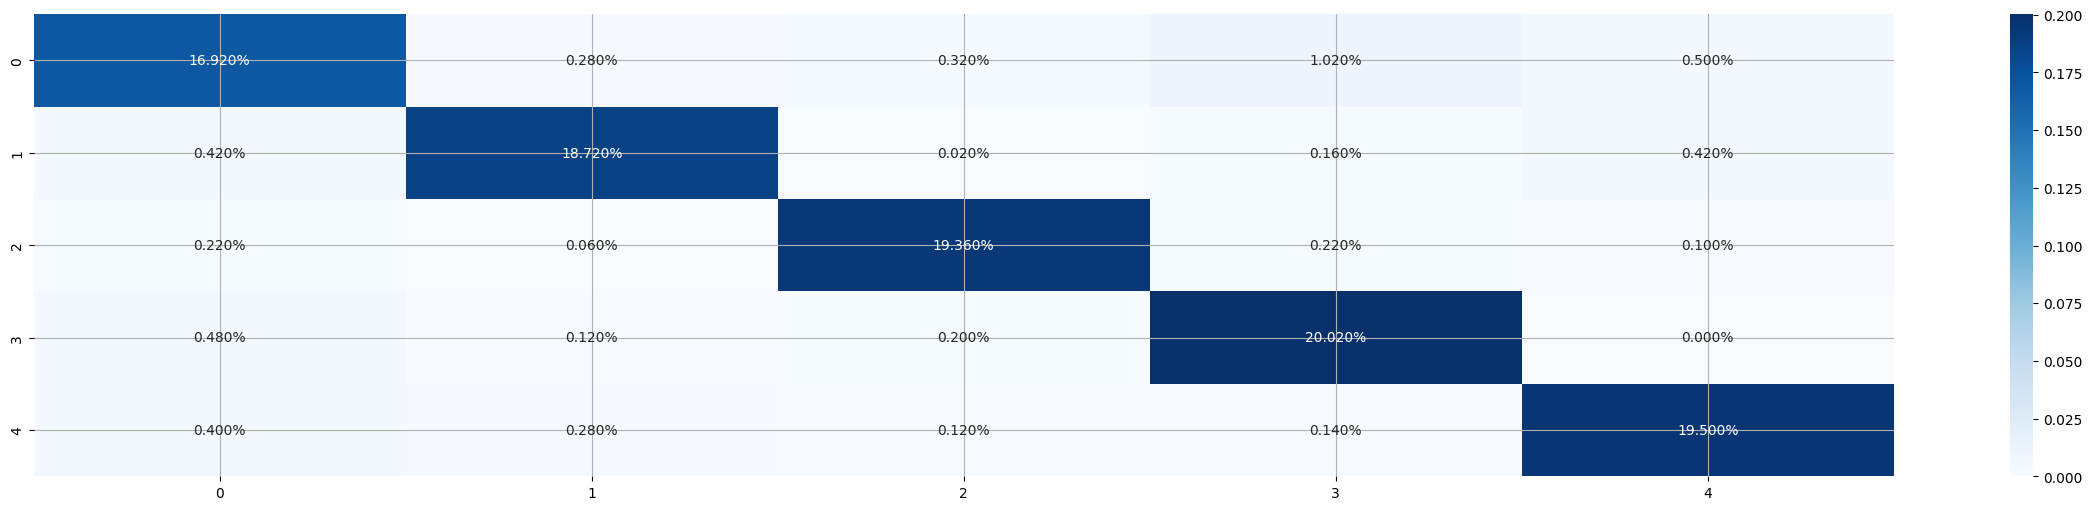

In [74]:
sns.heatmap(metrics.confusion_matrix(d1_test_y, DTpred)/np.sum(metrics.confusion_matrix(d1_test_y, DTpred)), annot=True, fmt='.3%',cmap='Blues')

# -----------------------------------------------------------------------------------------
# RANDOM FOREST
**builds multiple decision trees during training and merges them together to get a more accurate and stable prediction**

# Train

In [75]:
from sklearn.ensemble import RandomForestClassifier

# number of trees in the forest : Random forest will consist of 100 decision trees
rf = RandomForestClassifier(n_estimators = 100)

# Training the RandomForest : d2_train_x as features and d1_train_y as labels
rf.fit(d2_train_x, d1_train_y)

RandomForestClassifier()

# Test

In [76]:
# Making Predictions : test data (d2_test_x)
RFpred = rf.predict(d2_test_x)

# Accuracy

In [77]:
# compares true labels with predicted labels
print(metrics.accuracy_score(d1_test_y, RFpred))

0.9818


# precision, recall, f1-score

In [78]:
# including precision, recall, f1-score, and support:occurrences of each class in the specified target variable for each class
print(metrics.classification_report(d1_test_y, RFpred))

#   macro avg : This is the average of the metrics (precision, recall, F1-score) calculated for each class independently
# weighted avg : weighted by its support

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96       952
         1.0       1.00      0.99      0.99       987
         2.0       0.99      0.99      0.99       998
         3.0       0.99      0.97      0.98      1041
         4.0       0.99      0.99      0.99      1022

    accuracy                           0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000



# confusion matrix

In [79]:
print(metrics.confusion_matrix(d1_test_y, RFpred))

[[ 930    2    4   12    4]
 [   7  974    0    1    5]
 [   9    0  989    0    0]
 [  25    0    7 1009    0]
 [   7    2    4    2 1007]]


<Axes: >

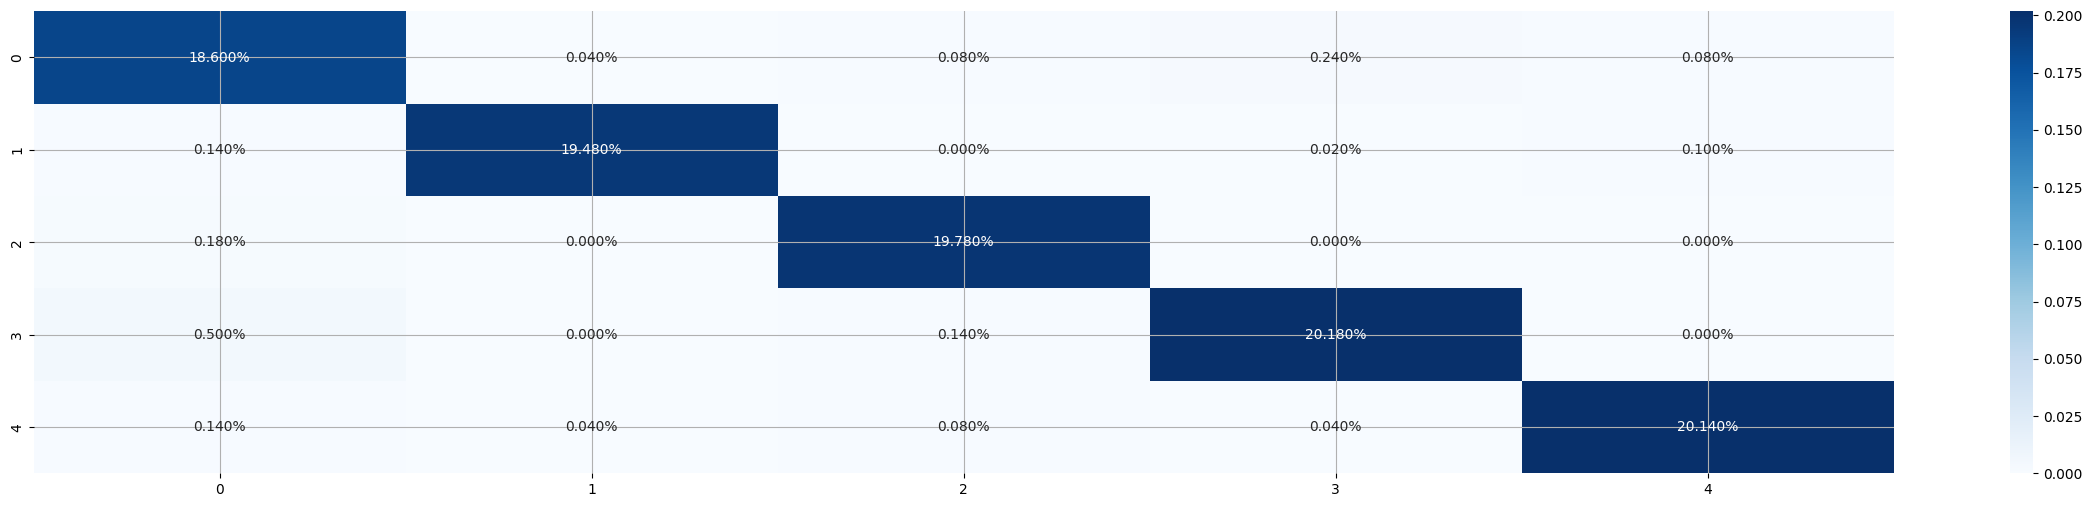

In [80]:
sns.heatmap(metrics.confusion_matrix(d1_test_y, RFpred)/np.sum(metrics.confusion_matrix(d1_test_y, RFpred)), annot=True, fmt='.3%',cmap='Blues')

# results

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


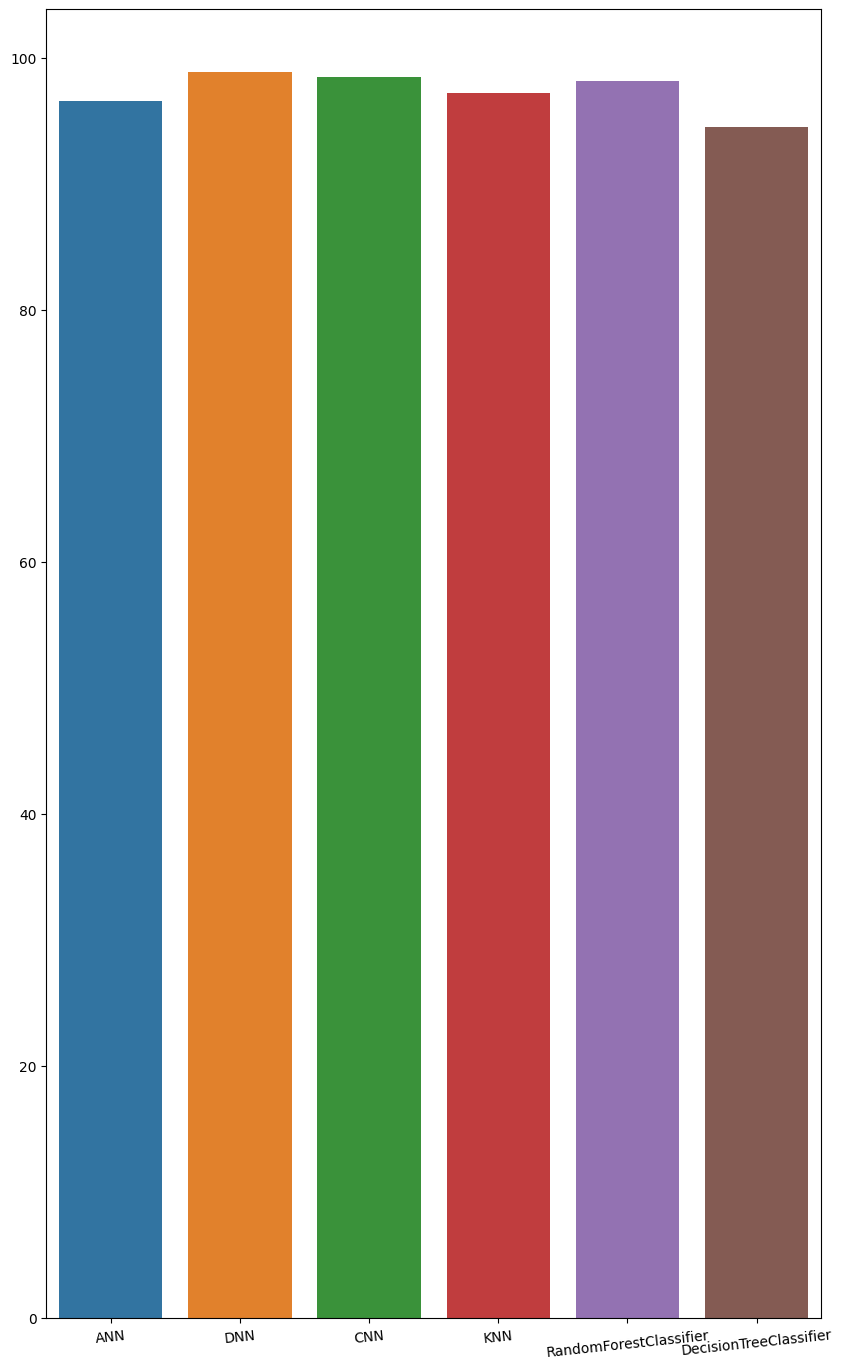

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
  
fig, ax = plt.subplots(figsize=(10, 17))
    
g = sns.barplot(x=["ANN", "DNN", "CNN", "KNN", "RandomForestClassifier","DecisionTreeClassifier", ],
                y= [96.56, 98.9, 98.44, 97.2, 98.18, 94.5])
g.set_xticklabels(
    labels=["ANN", "DNN", "CNN", "KNN", "RandomForestClassifier", "DecisionTreeClassifier",], rotation=6)

# Show the plot
plt.show()

# test1

Actual label:  L
Model prediction :  L  with probability  0.9999974


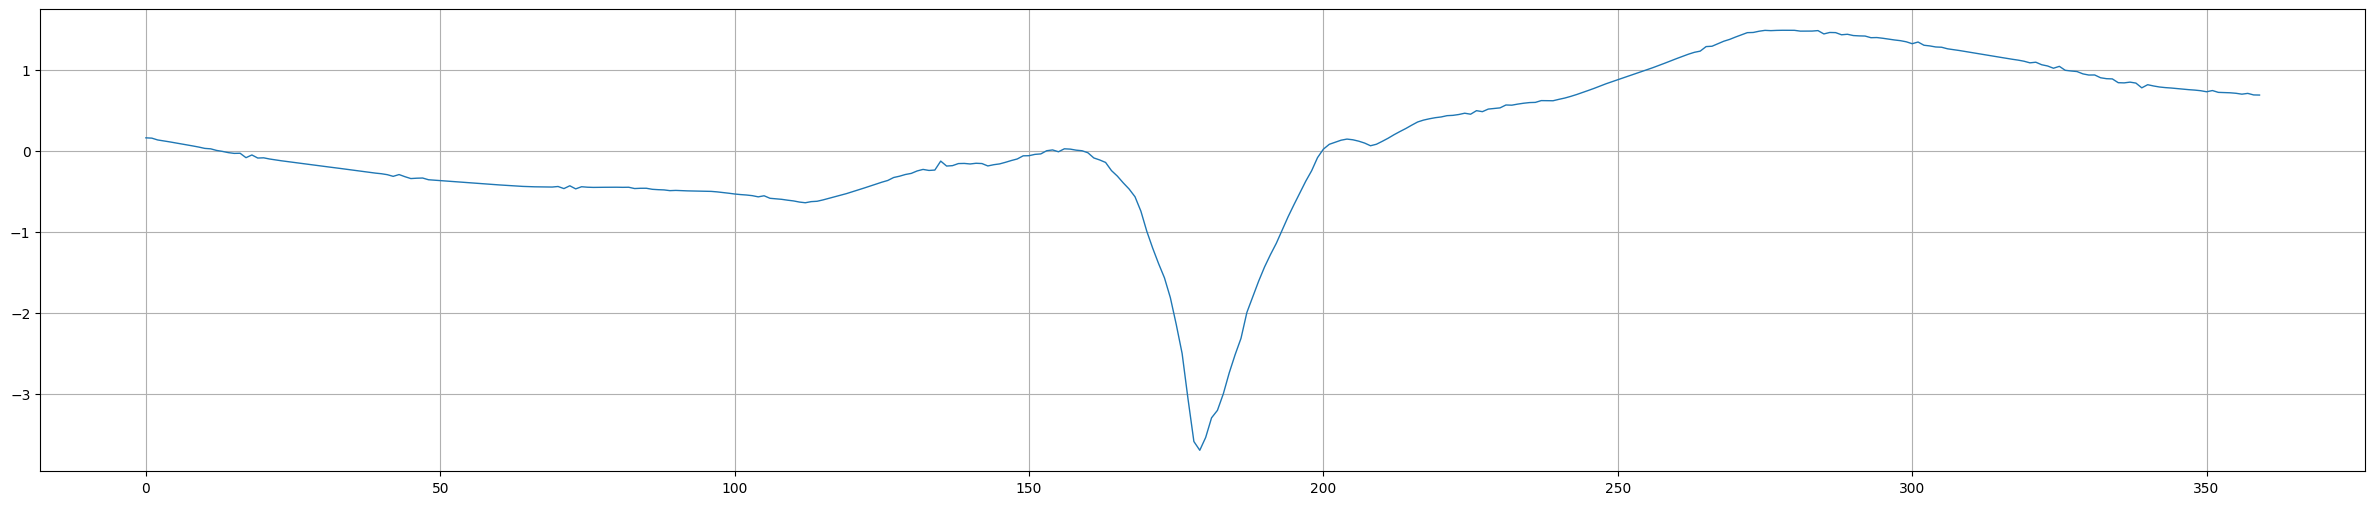

In [82]:
import random
i = random.randint(0, len(test_x)-1)

output = CNNmodel(np.expand_dims(test_x[i], 0))

pred = output.numpy()[0]

plt.plot(test_x[i])

print("Actual label: ", classes[np.argmax(test_y[i])])
print("Model prediction : ", classes[np.argmax(pred)], " with probability ", pred[np.argmax(pred)])

# test2

Actual label:  R
Model prediction :  R  with probability  0.99941635


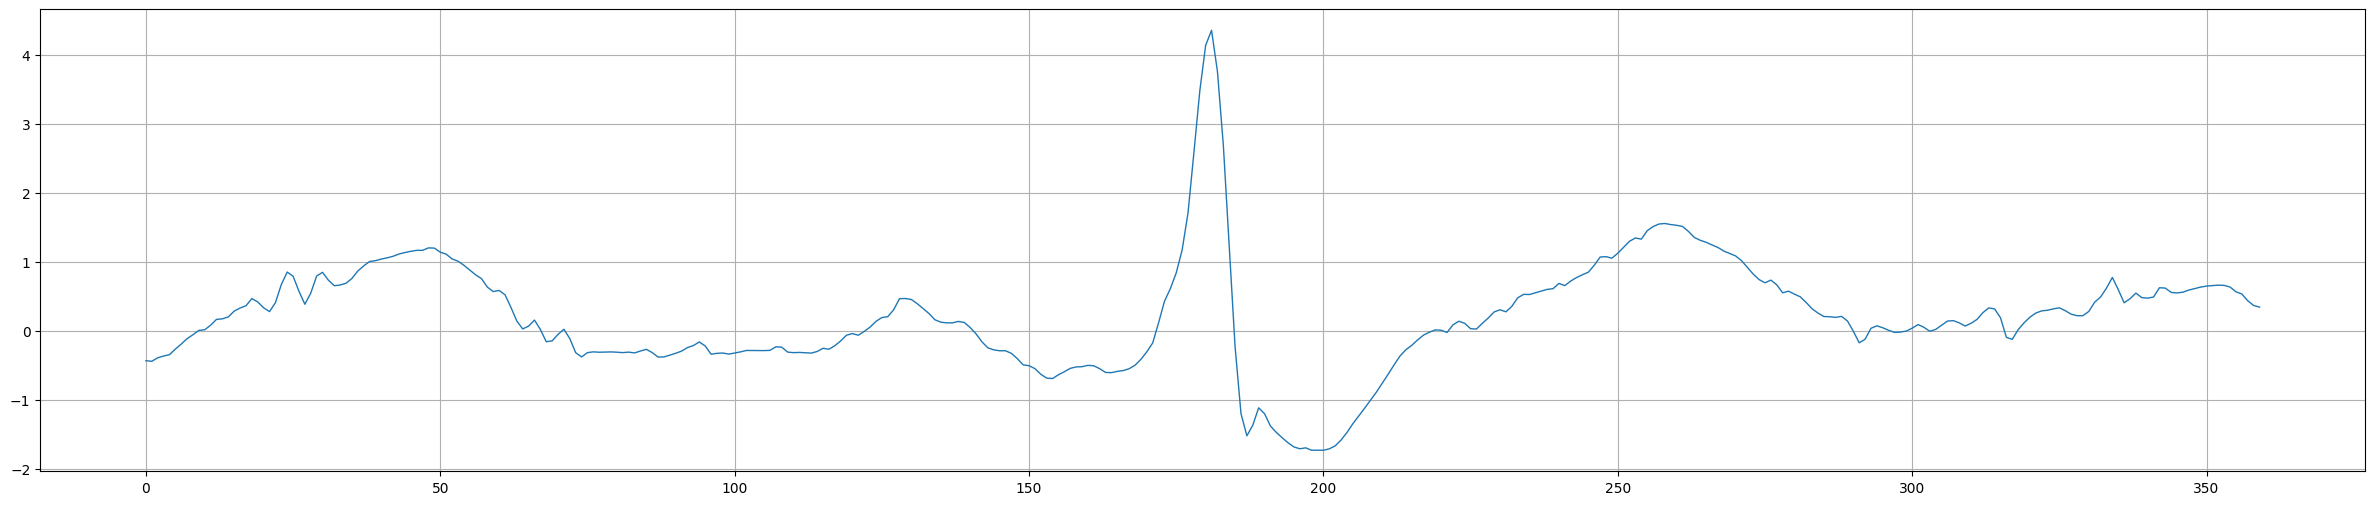

In [83]:
import random
i = random.randint(0, len(test_x)-1)

output = ANNmodel(np.expand_dims(test_x[i], 0))

pred = output.numpy()[0]

plt.plot(test_x[i])

print("Actual label: ", classes[np.argmax(test_y[i])])
print("Model prediction : ", classes[np.argmax(pred)], " with probability ", pred[np.argmax(pred)])

# test3

Actual label:  R
Model prediction :  R  with probability  1.0


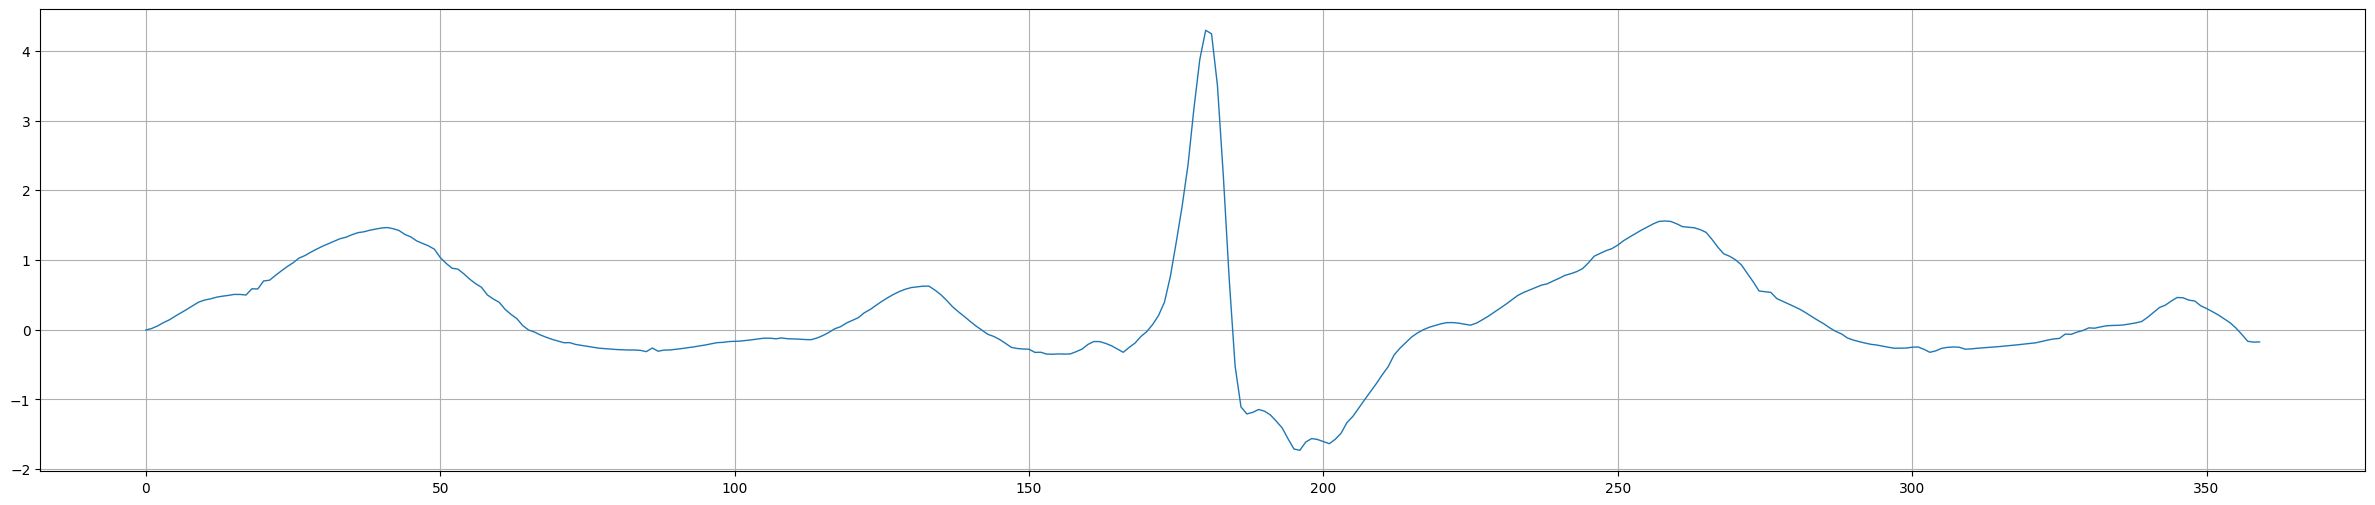

In [84]:
import random
i = random.randint(0, len(test_x)-1)

output = DNNmodel(np.expand_dims(test_x[i], 0))

pred = output.numpy()[0]

plt.plot(test_x[i])

print("Actual label: ", classes[np.argmax(test_y[i])])
print("Model prediction : ", classes[np.argmax(pred)], " with probability ", pred[np.argmax(pred)])